# Comprensión EDA

# Introducción

En este notebook se realiza un análisis exploratorio de datos (EDA) para comprender el dataset, evaluar su calidad y dejarlo preparado para el modelado. Primero se hará una exploración inicial, describiendo el dataset, clasificando variables (numéricas y categóricas: ordinales/nominales; dicotómicas/politómicas), revisando valores nulos y unificando su representación. También se eliminarán variables irrelevantes y se corregirán tipos de datos (numéricos, categóricos, booleanos, fechas) para asegurar uniformidad por columna.

Luego se desarrolla el EDA en tres niveles: univariable (distribuciones, estadísticos, histogramas/boxplots, countplots), bivariable (relación con la variable objetivo mediante tablas y gráficos) y multivariable (correlaciones, pairplots, tablas cruzadas y dispersión con hue). A lo largo del análisis se incluyen interpretaciones para definir reglas de validación, posibles transformaciones y features derivadas útiles para las próximas etapas del proyecto.

## 0. Importación de librerías y carga de datos

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 5)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [2]:
data_path = Path("../../Base_de_datos.xlsx")

print("CWD:", Path.cwd())
print("Buscando archivo en:", data_path.resolve())

if not data_path.exists():
    raise FileNotFoundError(f"No se encontró el archivo en: {data_path.resolve()}")

df = pd.read_excel(data_path)

print("Dataset cargado con éxito.")

CWD: /Users/sofiaschanton/Desktop/Python3_Henry/Modulo_5/Proyecto_Integrador_M5/PI_M5/mlops_pipeline/src
Buscando archivo en: /Users/sofiaschanton/Desktop/Python3_Henry/Modulo_5/Proyecto_Integrador_M5/PI_M5/Base_de_datos.xlsx
Dataset cargado con éxito.


## 1. Exploración inicial de datos

### Descripción general de los datos

In [3]:
# Descripción general de los datos
print("\nDescripción general de los datos")

# Shape
print("Shape (filas, columnas):", df.shape)
display(df.head())

# Info
print("\nInformación general")
print(df.info())

# Describe
print("\nDescripción (númericas)")
print(df.describe())

# Tipo de datos
print("\nResumen de tipos de datos")
display(df.dtypes.value_counts())


Descripción general de los datos
Shape (filas, columnas): (10763, 23)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,"3,692,160.00",10,42,Independiente,8000000,2500000,341296,88.77,695.00,10,5,0.00,"51,258.00","51,258.00",0.00,5,0,0,"908,526.00",Estable,1
1,4,2025-04-22 09:47:35,"840,000.00",6,60,Empleado,3000000,2000000,124876,95.23,789.00,3,1,0.00,"8,673.00","8,673.00",0.00,0,0,2,"939,017.00",Creciente,1
2,9,2026-01-08 12:22:40,"5,974,028.40",10,36,Independiente,4036000,829000,529554,47.61,740.00,4,5,0.00,"18,702.00","18,702.00",0.00,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,"1,671,240.00",6,48,Empleado,1524547,498000,252420,95.23,837.00,4,4,0.00,"15,782.00","15,782.00",0.00,3,0,0,"1,536,193.00",Creciente,1
4,9,2025-04-26 11:24:26,"2,781,636.00",11,44,Empleado,5000000,4000000,217037,95.23,771.00,4,6,0.00,"204,804.00","204,804.00",0.00,3,0,1,"933,473.00",Creciente,1



Información general
<class 'pandas.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[us]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  str           
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_

int64             12
float64            8
datetime64[us]     1
str                1
object             1
Name: count, dtype: int64

In [4]:
# Renombrar columnas
# Todo minúsculas
df.columns = df.columns.str.strip().str.lower()

# Separación por _
rename_map = {
    "puntaje_datacredito": "puntaje_data_credito",
    "cant_creditosvigentes": "cant_creditos_vigentes",
    "creditos_sectorfinanciero": "creditos_sector_financiero",
    "creditos_sectorcooperativo": "creditos_sector_cooperativo",
    "creditos_sectorreal": "creditos_sector_real",
    "promedio_ingresos_datacredito": "promedio_ingresos_data_credito",
    "pago_atiempo": "pago_a_tiempo"
}

df.rename(columns=rename_map, inplace=True)
df.columns


Index(['tipo_credito', 'fecha_prestamo', 'capital_prestado', 'plazo_meses',
       'edad_cliente', 'tipo_laboral', 'salario_cliente',
       'total_otros_prestamos', 'cuota_pactada', 'puntaje',
       'puntaje_data_credito', 'cant_creditos_vigentes', 'huella_consulta',
       'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor',
       'creditos_sector_financiero', 'creditos_sector_cooperativo',
       'creditos_sector_real', 'promedio_ingresos_data_credito',
       'tendencia_ingresos', 'pago_a_tiempo'],
      dtype='str')

####  Descripción del dataset

+ `tipo_credito`: Tipo de préstamo (cat).

+ `fecha_prestamo`: Fecha en que se entregó el préstamo (date).

+ `capital_prestado`: Cuánto dinero se prestó (float).

+ `plazo_meses`: En cuántos meses se debe devolver (int).

+ `edad_cliente`: Edad de la persona (int).

+ `tipo_laboral`: Tipo de trabajo (empleado, independiente) (cat).

+ `salario_cliente`: Ingreso mensual (o salario) de la persona (float).

+ `total_otros_prestamos`: Total de dinero que la persona ya tiene en otros préstamos (float).

+ `cuota_pactada`: Valor de la cuota que debe pagar periódicamente (float).

+ `puntaje`: Puntuación interna (una “nota” de riesgo calculada por la empresa) (float).

+ `puntaje_data_credito`: Puntuación externa reportada por Datacrédito (otra “nota” de historial) (float).

+ `cant_creditos_vigentes`:` Cuántos préstamos tiene activos en ese momento (int).

+ `huella_consulta`: Cantidad de veces que consultaron su historial (más consultas = más “movimiento”) (int).

+ `saldo_mora`: Dinero atrasado (deuda vencida) de la persona (float).

+ `saldo_total`: Deuda total que tiene registrada (float).

+ `saldo_principal`: Parte “principal” de la deuda (sin entrar en detalles de recargos) (float).

+ `saldo_mora_codeudor`: Deuda atrasada del codeudor (si hay alguien que respalda el préstamo) (float).

+ `creditos_sector_financiero`: Cantidad (o nivel) de créditos que tiene en entidades financieras (int).

+ `creditos_sector_cooperativo`: Cantidad (o nivel) de créditos que tiene en cooperativas (int).

+ `creditos_sector_real`: Cantidad (o nivel) de créditos que tiene en comercios/sector real (int).

+ `promedio_ingresos_data_credito`: Ingreso promedio estimado/reportado por Datacrédito (float).

+ `tendencia_ingresos`: Cómo vienen los ingresos con el tiempo (por ejemplo: creciente / estable / decreciente) (cat).

+ `pago_a_tiempo`: Si pagó a tiempo (1 = sí, 0 = no). Es la variable objetivo (int)

In [5]:
# Control de fechas
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"], errors="coerce")

# "Hoy" (momento del análisis)
hoy = pd.Timestamp.today()

# Conteo y porcentaje de fechas > hoy (solo no nulas)
mask_notna = df["fecha_prestamo"].notna()
mask_future = mask_notna & (df["fecha_prestamo"] > hoy)

n_future = mask_future.sum()
n_total  = mask_notna.sum()
pct_future = (n_future / n_total) * 100

print(f"Hoy: {hoy}")
print(f"Fechas > hoy: {n_future} de {n_total} ( {pct_future:.2f}% )")

Hoy: 2026-02-07 09:02:43.042177
Fechas > hoy: 108 de 10763 ( 1.00% )


In [6]:
# Revisión de duplicados
print("\nValores duplicados:")
print(df.duplicated().sum())


Valores duplicados:
0


### Revisión de nulos.

In [7]:
#Unificación de nulos
nulos_antes = df.isna().sum()

null_like = [
    "", " ", "  ", "\t",
    "na", "n/a", "null", "none", "nan",
    "-", "--", "s/d", "sin dato", "no aplica"
]

# 1) Unificar nulos en columnas object/category 
obj_cols = df.select_dtypes(include=["object", "category"]).columns

def clean_null_like(x):
    if isinstance(x, str):
        v = x.strip().lower()
        return pd.NA if v in null_like else v  # opcional: devolver v o x
    return x  # deja números/otros tipos intactos

df[obj_cols] = df[obj_cols].apply(clean_null_like)

# 2) Unificar infinitos como NA en numéricas
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], pd.NA)

nulos_despues = df.isna().sum()

comparacion = (
    pd.DataFrame({
        "nulos_antes": nulos_antes,
        "nulos_despues": nulos_despues,
        "diff": nulos_despues - nulos_antes
    })
    .sort_values("diff", ascending=False)
)

print("Unificación de nulos aplicada (placeholders textuales + infinitos → NA) sin forzar str.")
display(comparacion[comparacion["diff"] != 0])


Unificación de nulos aplicada (placeholders textuales + infinitos → NA) sin forzar str.


,nulos_antes,nulos_despues,diff


#### Se aplicó una estandarización de nulos (placeholders textuales e infinitos → pd.NA). No se detectaron cambios en el conteo de faltantes, lo que indica que el dataset ya representaba correctamente los valores nulos (o que no había placeholders adicionales por corregir).

In [8]:
# Tipos de datos por columna
df.dtypes.astype(str).to_frame("dtype").sort_values("dtype")

# Revisar tipos de datos en cada columna
def tipos_internos(df):
    rows = []
    for col in df.columns:
        tipos = df[col].dropna().apply(type).value_counts()
        if len(tipos) > 1:
            rows.append({
                "columna": col,
                "dtype_pandas": str(df[col].dtype),
                "tipos_internos": {t.__name__: int(n) for t, n in tipos.items()}
            })
    return pd.DataFrame(rows)

mix = tipos_internos(df)
print("Columnas con tipo de datos mezclados:")

if mix.empty:
    display(pd.DataFrame({"mensaje": ["No se detectaron columnas con tipos mezclados."]}))
else:
    display(mix)

Columnas con tipo de datos mezclados:


,columna,dtype_pandas,tipos_internos
0,tendencia_ingresos,object,"{'str': 7773, 'int': 58}"


In [9]:
# Columna tendencia_ingresos tiene tipos de datos mezclados.
tipos = df['tendencia_ingresos'].dropna().map(type).value_counts()
porcentajes = (tipos / tipos.sum() * 100).round(2)

tabla = pd.DataFrame({
    "conteo": tipos,
    "%": porcentajes
})
display(tabla)

,conteo,%
tendencia_ingresos,,
<class 'str'>,7773,99.26
<class 'int'>,58,0.74


In [10]:
# Imputamos como nulos los 58 datos numéricos
col_invalid = 'tendencia_ingresos'

# detectar los inválidos numéricos (sean int reales o strings numéricos)
mask = df[col_invalid].astype('string').str.fullmatch(r"-?\d+").fillna(False)

# 1) DF de trazabilidad (copia con índice + valor original)
tendencia_ingresos_trazabilidad = df.loc[mask, [col_invalid]].copy()

# (opcional) guardar también el índice como columna
tendencia_ingresos_trazabilidad = tendencia_ingresos_trazabilidad.reset_index().rename(columns={'index':'row_id'})

# 2) imputar a NaN en el df original
df.loc[mask, col_invalid] = pd.NA

print("Guardados:", len(tendencia_ingresos_trazabilidad))
print("Nulos ahora:", df[col_invalid].isna().sum())
tendencia_ingresos_trazabilidad.head(10)

Guardados: 58
Nulos ahora: 2990


,row_id,tendencia_ingresos
0,157,8315
1,168,0
2,440,158042
3,486,3978
4,705,9147
5,1185,8315
6,1188,168750
7,1898,-28589
8,2027,8315
9,2038,1000000


##### Se detectaron 58 valores numéricos inválidos en tendencia_ingresos (variable categórica). Se guardaron para trazabilidad y se reemplazaron por valores nulos (NA) para evitar ruido en el encoding y permitir una imputación consistente.

In [11]:
# Revisión de nulos por columna
nulos = df.isnull().sum()
cols_nulos = df.columns[df.isnull().any()].tolist()
porcentaje_nulos = (df.isnull().mean() * 100).round(2)

tabla_nulos = (
    pd.DataFrame({
        "nulos": nulos,
        "%_nulos": porcentaje_nulos
    })
    .sort_values("%_nulos", ascending=False)
)

display(tabla_nulos[tabla_nulos["nulos"] > 0])

,nulos,%_nulos
tendencia_ingresos,2990,27.78
promedio_ingresos_data_credito,2930,27.22
saldo_mora_codeudor,590,5.48
saldo_principal,405,3.76
saldo_total,156,1.45
saldo_mora,156,1.45
puntaje_data_credito,6,0.06


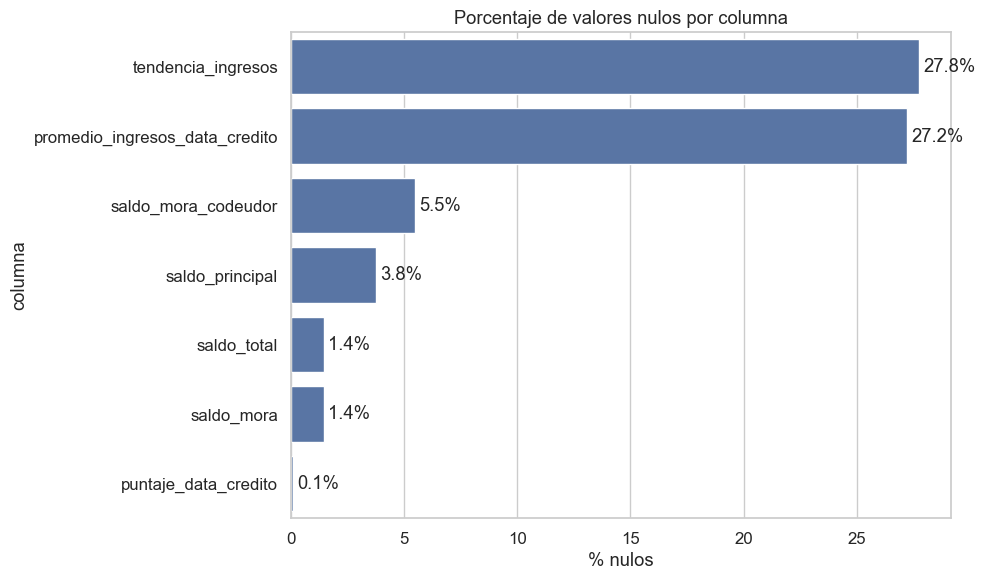

In [12]:
# Representación gráfica de nulos
tabla_plot = (
    tabla_nulos[tabla_nulos["nulos"] > 0]
    .sort_values("%_nulos", ascending=False)
    .reset_index()
    .rename(columns={"index": "columna"})
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=tabla_plot, x="%_nulos", y="columna")
ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.xlabel("% nulos")
plt.title("Porcentaje de valores nulos por columna")
plt.tight_layout()
plt.show()

#### A destacar:
Los valores faltantes se concentran en pocas variables: `tendencia_ingresos` (27,8%) y `promedio_ingresos_data_credito` (27,2%) son las más afectadas, mientras que los saldos presentan nulos moderados (`saldo_mora_codeudor` 5,5%, `saldo_principal` 3,8%) y el resto es marginal (≤1,4%). Por ello, se prioriza imputación + flags de missing en lugar de eliminar filas.

## Tratamiento de nulos

In [13]:
# Tratamiento de valores nulos 


# 1) Imputación numéricas (mediana: robusta frente a outliers)
df["promedio_ingresos_data_credito"] = df["promedio_ingresos_data_credito"].fillna(df["promedio_ingresos_data_credito"].median())
df["puntaje_data_credito"] = df["puntaje_data_credito"].fillna(df["puntaje_data_credito"].median())

# 2) Imputación de saldos (0 suele representar ausencia de saldo/mora)
for col in ["saldo_mora_codeudor", "saldo_principal", "saldo_total", "saldo_mora"]:
    df[col] = df[col].fillna(0)

# 3) Imputación / limpieza categóricas
df["tendencia_ingresos"] = df["tendencia_ingresos"].fillna("Desconocido").astype(str).str.strip().str.lower()
df["tipo_laboral"] = df["tipo_laboral"].astype(str).str.strip().str.lower()

df.isnull().sum().sort_values(ascending=False).head(10)


tipo_credito                      0
huella_consulta                   0
tendencia_ingresos                0
promedio_ingresos_data_credito    0
creditos_sector_real              0
creditos_sector_cooperativo       0
creditos_sector_financiero        0
saldo_mora_codeudor               0
saldo_principal                   0
saldo_total                       0
dtype: int64

 
+ `promedio_ingresos_data_credito` se imputa con mediana y se crea miss_promedio_ingresos_data_credito; 
+ `tendencia_ingresos` se imputa con "Desconocido" y se crea miss_tendencia_ingresos. 
Los saldos (`saldo_mora_codeudor`, `saldo_principal`, `saldo_total`, `saldo_mora`) se imputan con 0 (interpretación típica: ausencia de saldo/mora). `puntaje_data_credito` (0,1% nulos) se imputa con mediana.

Se identificó un 1,0% de registros con fecha_prestamo posterior a la fecha de análisis; se trataron como faltantes (NaT) y se agregó un indicador (flag_fecha_prestamo_futura) para preservar información.”

### Eliminación de variables irrelevantes

In [14]:
# Revisar columnas irrelevantes
# Columnas constantes
constantes = [c for c in df.columns if df[c].nunique(dropna=True) <= 1]
print("Columnas constantes:", constantes)

# Columnas duplicadas
duplicadas = []
cols = df.columns.tolist()

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicadas.append((cols[i], cols[j]))

print("Pares de columnas duplicadas:", duplicadas)


Columnas constantes: []
Pares de columnas duplicadas: []


In [15]:
# Verificar variabilidad de las columnas marcadas
for c in constantes:
    print(f"{c}: únicos ->", df[c].unique()[:10])

In [16]:
# Eliminar columnas constantes
cols_eliminar = set(constantes)
for a, b in duplicadas:
    cols_eliminar.add(b)   # eliminamos la segunda del par

cols_eliminar = sorted(cols_eliminar)
print("Columnas a eliminar:", cols_eliminar)

Columnas a eliminar: []


In [17]:
# Guardar en un DF por trazabilidad
df_cols_eliminadas = df[cols_eliminar].copy()
print("Backup creado:", df_cols_eliminadas.shape)

Backup creado: (10763, 0)


In [18]:
# Eliminar del df principal
df = df.drop(columns=cols_eliminar)
print("Nuevo dataset:", df.shape)

Nuevo dataset: (10763, 23)


In [19]:
# Confirmar que ya no están
set(cols_eliminar).intersection(df.columns)

set()

##### Se revisaron columnas irrelevantes para el modelado, pero no se identificando variables constantes (sin variación) y ni columnas duplicadas.

### Conversión y corrección de tipo de datos

In [20]:
# Tipos de datos por columna
df.dtypes.astype(str).to_frame("dtype").sort_values("dtype")

,dtype
fecha_prestamo,datetime64[us]
capital_prestado,float64
promedio_ingresos_data_credito,float64
saldo_mora_codeudor,float64
saldo_principal,float64
puntaje,float64
puntaje_data_credito,float64
saldo_total,float64
saldo_mora,float64
tipo_credito,int64


In [21]:
# Convertir tipo de datos
# A category
df['tipo_credito'] = df['tipo_credito'].astype('category')  
df['tipo_laboral'] = df['tipo_laboral'].astype('category')
df['tendencia_ingresos'] = df['tendencia_ingresos'].astype('category')

In [22]:
# Separar columnas por tipo
target = 'pago_a_tiempo'
exclude_num = [target]

num_cols = df.select_dtypes(include=["number"]).columns.drop(exclude_num, errors="ignore").tolist()
cat_cols = df.select_dtypes(include=["object", "category","str"]).columns.tolist()
dt_cols = df.select_dtypes(include=["datetime"]).columns.tolist()

print("\nColumnas numéricas:", len(num_cols), num_cols)
print("Columnas categóricas (object/category):", len(cat_cols), cat_cols)
print("Columnas datetime:", len(dt_cols), dt_cols)

# Dicotómicas y politómicas (para categóricas)
nunique_cat = df[cat_cols].nunique(dropna=True)

dicotomicas = nunique_cat[nunique_cat == 2].index.tolist()
politomicas = nunique_cat[nunique_cat > 2].index.tolist()

print("Dicotómicas:", dicotomicas)
print("Politómicas:", politomicas)


Columnas numéricas: 18 ['capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_data_credito', 'cant_creditos_vigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sector_financiero', 'creditos_sector_cooperativo', 'creditos_sector_real', 'promedio_ingresos_data_credito']
Columnas categóricas (object/category): 3 ['tipo_credito', 'tipo_laboral', 'tendencia_ingresos']
Columnas datetime: 1 ['fecha_prestamo']
Dicotómicas: ['tipo_laboral']
Politómicas: ['tipo_credito', 'tendencia_ingresos']


##### Se corrigieron tipos de datos y se separaron variables en numéricas, categóricas y temporales para aplicar preprocesamiento adecuado (encoding, escalado y features temporales) y evitar inconsistencias en el pipeline.

#### **Resumen de exploración inicial de datos**
+ El dataset cuenta con 10.763 filas y 23 columnas, y no se detectaron registros duplicados.

+ En la revisión de calidad de datos, se identificó que tendencia_ingresos presentaba tipos de datos mezclados (string e int), por lo que esos valores inconsistentes se normalizaron imputándolos como NaN para poder tratarlos correctamente.

+ Se detectaron valores nulos en las siguientes variables y se definió una estrategia de imputación acorde al tipo y significado del dato:

    + tendencia_ingresos (27,78%) → imputación con “desconocido” (categoría).

    + promedio_ingresos_data_credito (27,22%) → imputación con mediana.

    + Saldos: saldo_mora_codeudor (5,48%), saldo_principal (3,76%), saldo_total (1,45%), saldo_mora (1,45%) → imputación con 0 .

    + puntaje_data_credito (0,06%) → imputación con mediana.

+ Control de fechas (fecha_prestamo): se identificó un 1,00% de registros (108/10.763) con fechas posteriores a la fecha actual (al momento del análisis). No se consideraron un error, ya que el dataset corresponde a un corte fijo y la “fecha actual” no necesariamente coincide con la fecha de referencia del dataset. Por este motivo, se mantuvieron sin modificaciones. Además, para evitar inconsistencias en el modelado, cualquier variable temporal derivada (por ejemplo, días desde el préstamo) se calculará respecto a la fecha de corte del dataset y no respecto a la fecha actual.

+ Para optimizar el manejo y análisis, se convirtieron a tipo categórico las variables: tipo_credito, tipo_laboral y tendencia_ingresos.

+ Finalmente, se realizó una separación de columnas por tipo de dato (numéricas, categóricas y fecha) como base para el análisis univariable/multivariable y el posterior preprocesamiento/modelado.

## 2. Exploración de datos y descripción (EDA)

### 2.1. Análisis univariable

In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha_prestamo,10763,2025-04-16 23:06:02.111121,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN
capital_prestado,"10,763.00","2,434,315.00","360,000.00","1,224,831.00","1,921,920.00","3,084,840.00","41,444,152.80","1,909,642.76"
plazo_meses,"10,763.00",10.58,2.00,6.00,10.00,12.00,90.00,6.63
edad_cliente,"10,763.00",43.95,19.00,33.00,42.00,53.00,123.00,15.06
salario_cliente,"10,763.00","17,216,431.46",0.00,"2,000,000.00","3,000,000.00","4,875,808.00","22,000,000,000.00","355,476,717.60"
total_otros_prestamos,"10,763.00","6,238,869.65",0.00,"500,000.00","1,000,000.00","2,000,000.00","6,787,675,263.00","118,418,316.94"
cuota_pactada,"10,763.00","243,617.41","23,944.00","121,041.50","182,863.00","287,833.50","3,816,752.00","210,493.69"
puntaje,"10,763.00",91.17,-38.01,95.23,95.23,95.23,95.23,16.47
puntaje_data_credito,"10,763.00",780.80,-7.00,757.00,791.00,825.00,999.00,104.85
cant_creditos_vigentes,"10,763.00",5.73,0.00,3.00,5.00,8.00,62.00,3.98


+ `fecha_prestamo`: cubre desde 2024-11-26 hasta 2026-04-26, con mediana alrededor de 2025-03-27, lo que permite analizar posibles efectos de estacionalidad/cambios por período. 

+ `capital_prestado`: media ≈ 2,43M, pero con alta dispersión (std ≈ 1,91M) y un máximo ≈ 41,44M, lo que sugiere outliers y distribución sesgada; conviene evaluar transformaciones.

+ `plazo_meses`: la mayoría de los créditos se concentra entre 6 y 12 meses, con mediana 10; existe un máximo de 90 meses (posibles casos atípicos).

+ `edad_cliente`: mediana 42, pero aparece un máximo de 123 años, valor irreal a tratar.

+ `salario_cliente` y `total_otros_préstamos`: ambas variables muestran colas largas y máximos muy altos (p.ej. salario_cliente hasta 22.000M y total_otros_prestamos hasta 6.787M), indicando asimetría fuerte y potenciales valores extremos que pueden afectar modelos sensibles a escala.

+ `cota_pactada`: también presenta variabilidad importante (máx ≈ 3,82M) y probable sesgo positivo.

+ `puntaje`: tiene un comportamiento llamativo: Q1 = Q2 = Q3 = 95,23 y máx = 95,23, lo que indica una concentración masiva en ese valor (posible discretización/topado o codificación). Además, aparece un mínimo negativo (-38,01) que conviene validar. puntaje_data_credito está en rangos típicos (hasta 999) pero con mínimo -7, también a revisar.

+ Variables de mora/saldos: `saldo_mora` tiene muchos ceros (Q1=Q2=Q3=0) y una cola con máximo 12.534, lo que indica que la mora es un evento poco frecuente pero con casos relevantes.

+ `pago_a_tiempo`(target): la media ≈ 0,95 confirma un fuerte desbalance (predominan pagos a tiempo), por lo que se deberán usar métricas como Recall/F1/PR-AUC y considerar ajuste de umbral o class_weight.


Conteo de la variable objetivo: 
pago_a_tiempo
0      511
1    10252
Name: count, dtype: int64

Distribución % de la variable objetivo: 
pago_a_tiempo
0    4.75
1   95.25
Name: proportion, dtype: float64


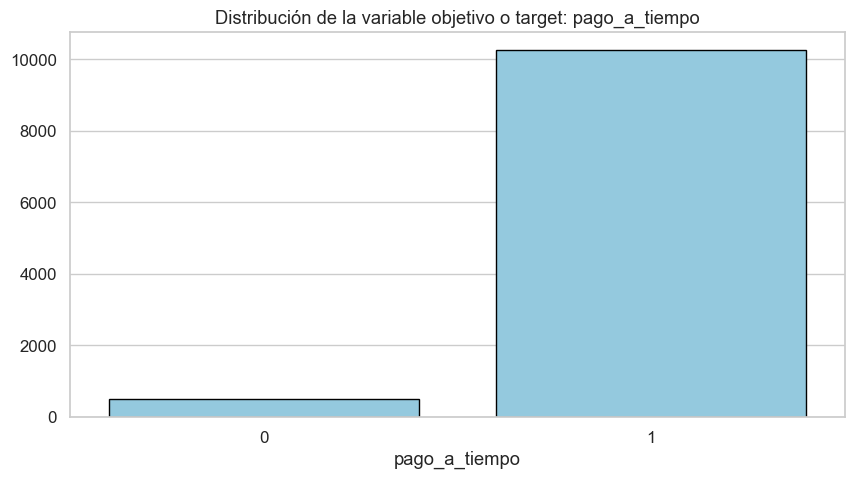

In [24]:
# Distribución del target
target = 'pago_a_tiempo'
print('\nConteo de la variable objetivo: ')
target_count = df[target].value_counts().sort_index()
print(target_count)

print('\nDistribución % de la variable objetivo: ')
target_count_porc = (df[target].value_counts(normalize=True).sort_index()*100).round(2)
print(target_count_porc)

#Gráfico de barras de la variable objetivo
sns.barplot(x=target_count.index.astype(str), y=target_count.values, color='skyblue', edgecolor='black')
plt.title(f"Distribución de la variable objetivo o target: {target}")
plt.show()

##### La variable objetivo está fuertemente desbalanceada (predomina pago_a_tiempo=1). Por ello, en el modelado se priorizarán métricas robustas al desbalance (Recall, F1, PR-AUC) y se evaluará el uso de class_weight y ajuste de umbral de decisión.

,count,mean,std,min,25%,50%,75%,max
capital_prestado,"10,763.00","2,434,315.00","1,909,642.76","360,000.00","1,224,831.00","1,921,920.00","3,084,840.00","41,444,152.80"
plazo_meses,"10,763.00",10.58,6.63,2.00,6.00,10.00,12.00,90.00
edad_cliente,"10,763.00",43.95,15.06,19.00,33.00,42.00,53.00,123.00
salario_cliente,"10,763.00","17,216,431.46","355,476,717.60",0.00,"2,000,000.00","3,000,000.00","4,875,808.00","22,000,000,000.00"
total_otros_prestamos,"10,763.00","6,238,869.65","118,418,316.94",0.00,"500,000.00","1,000,000.00","2,000,000.00","6,787,675,263.00"
cuota_pactada,"10,763.00","243,617.41","210,493.69","23,944.00","121,041.50","182,863.00","287,833.50","3,816,752.00"
puntaje,"10,763.00",91.17,16.47,-38.01,95.23,95.23,95.23,95.23
puntaje_data_credito,"10,763.00",780.80,104.85,-7.00,757.00,791.00,825.00,999.00
cant_creditos_vigentes,"10,763.00",5.73,3.98,0.00,3.00,5.00,8.00,62.00
huella_consulta,"10,763.00",4.23,3.06,0.00,2.00,4.00,6.00,29.00


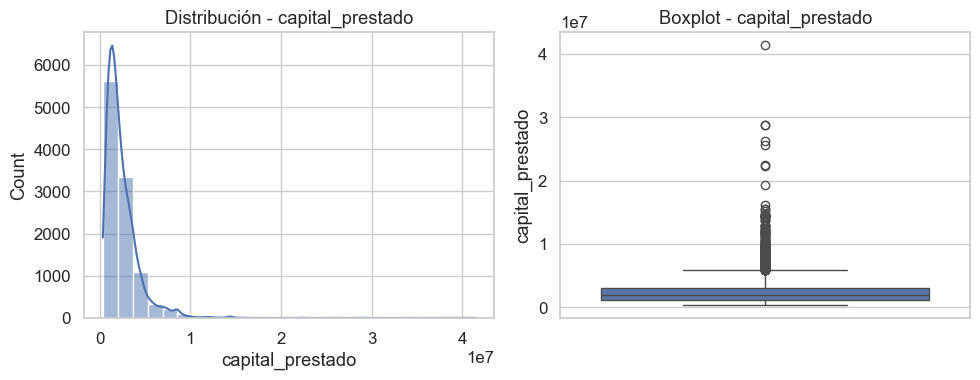

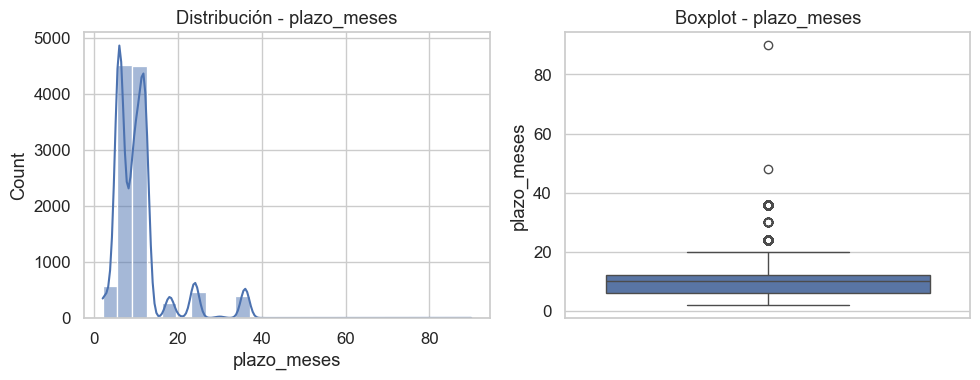

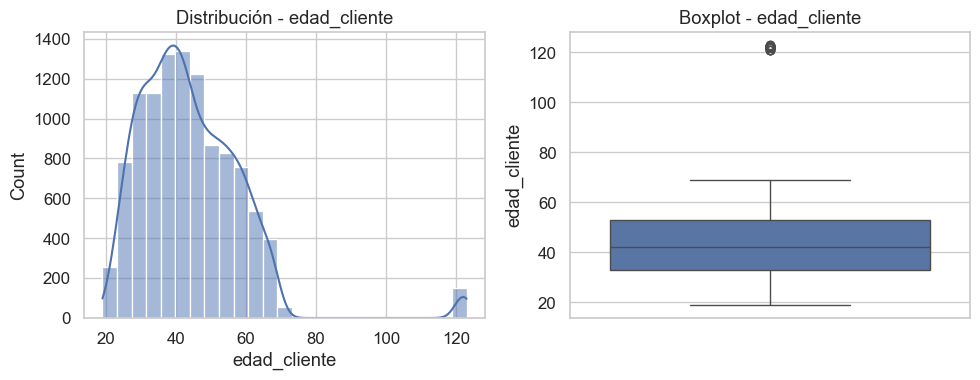

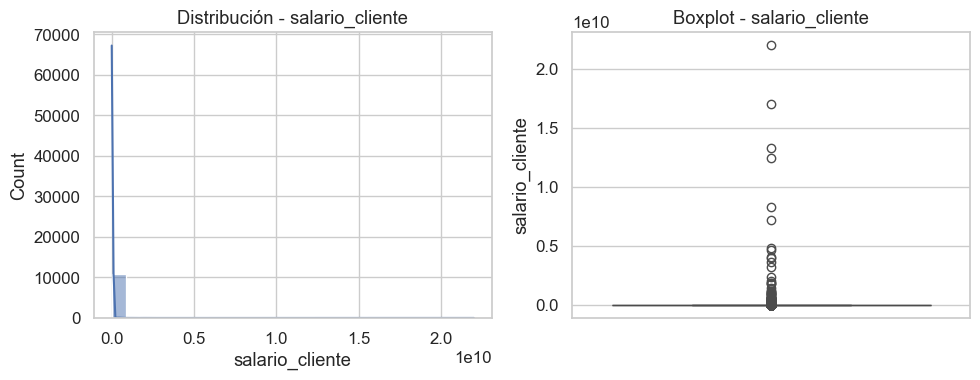

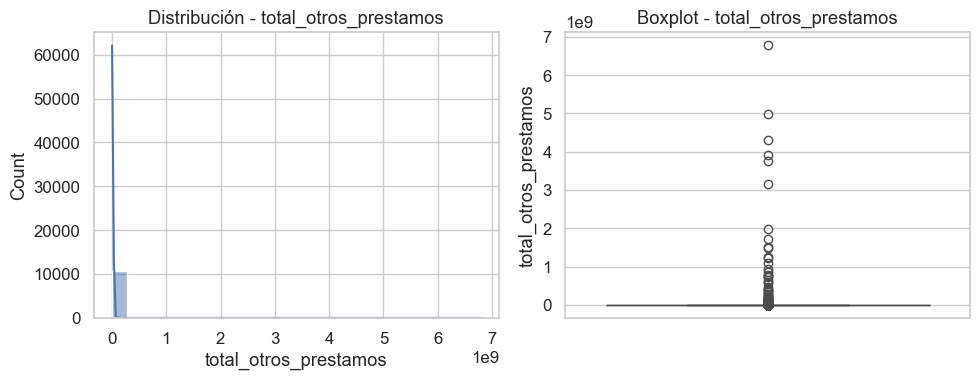

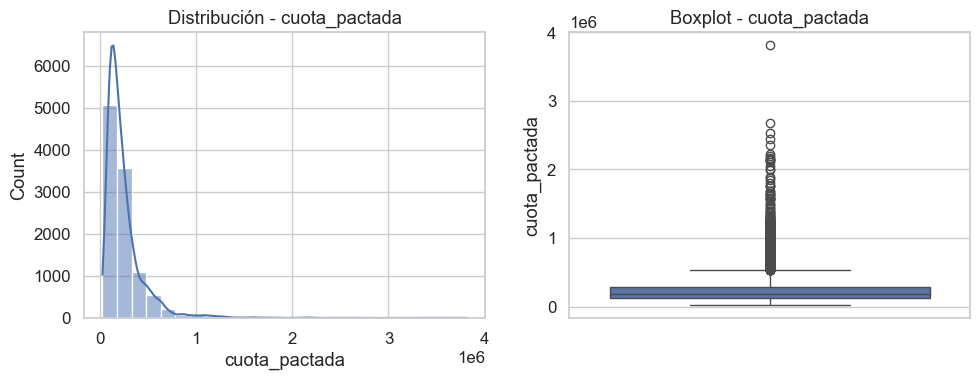

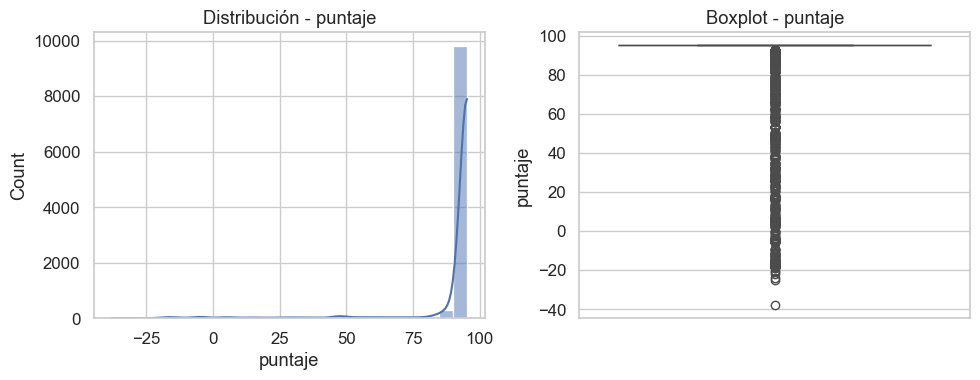

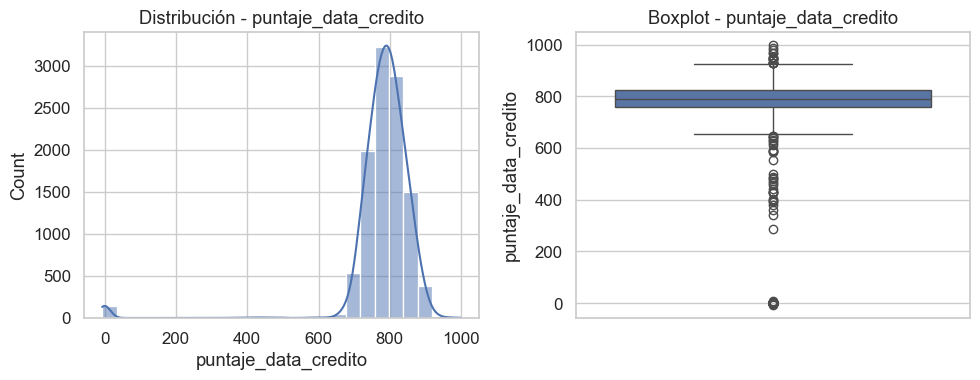

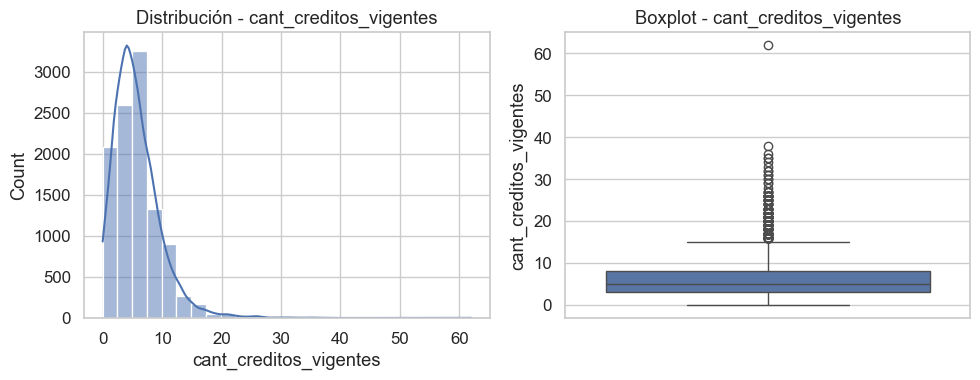

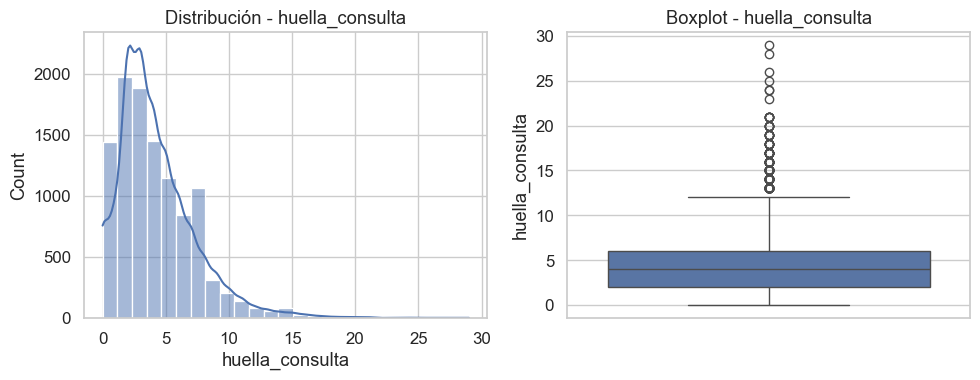

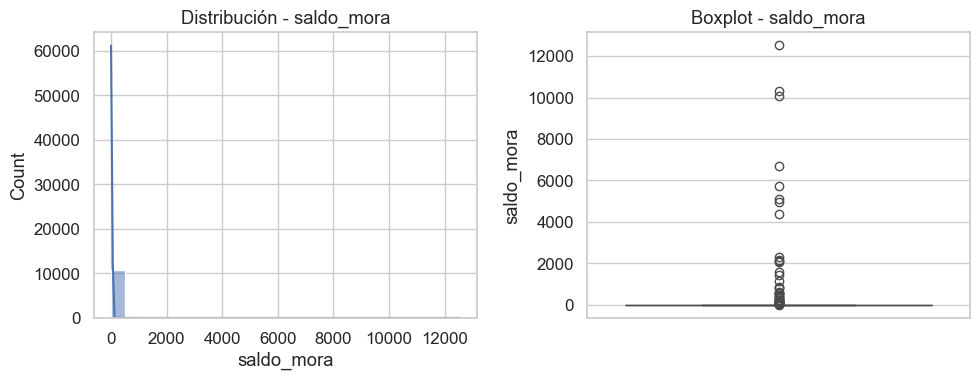

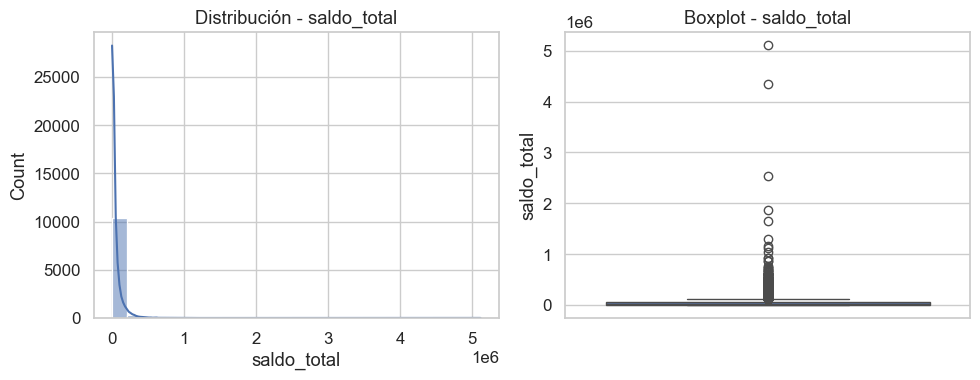

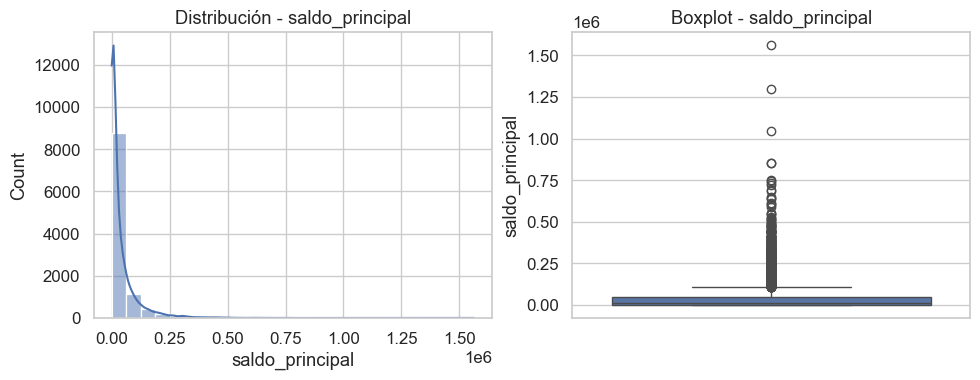

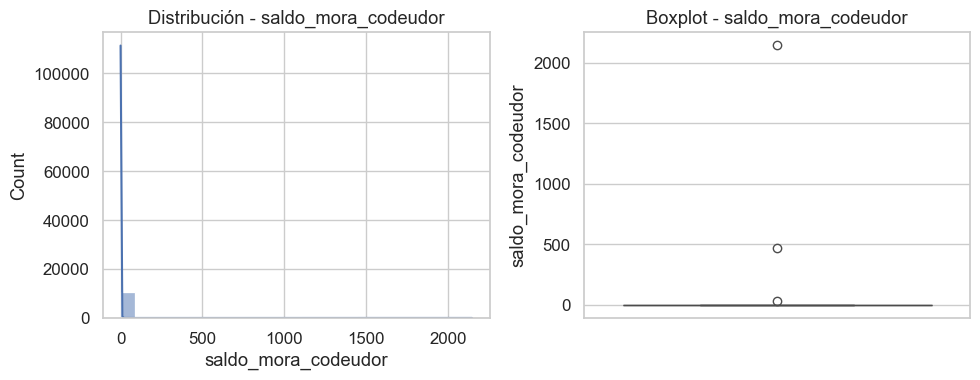

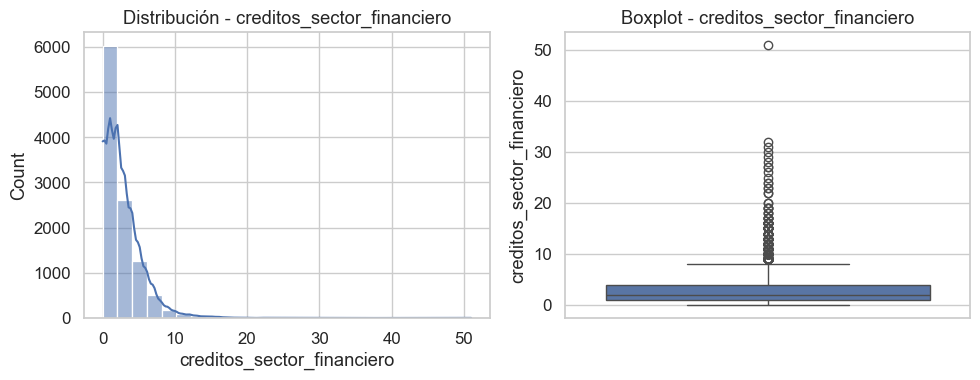

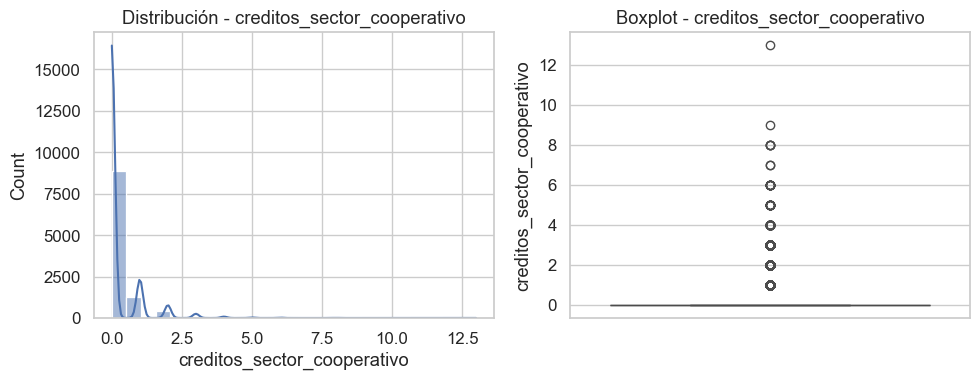

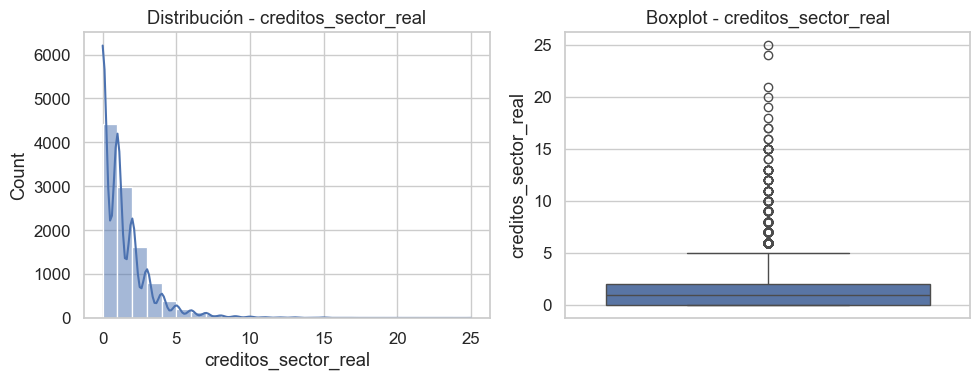

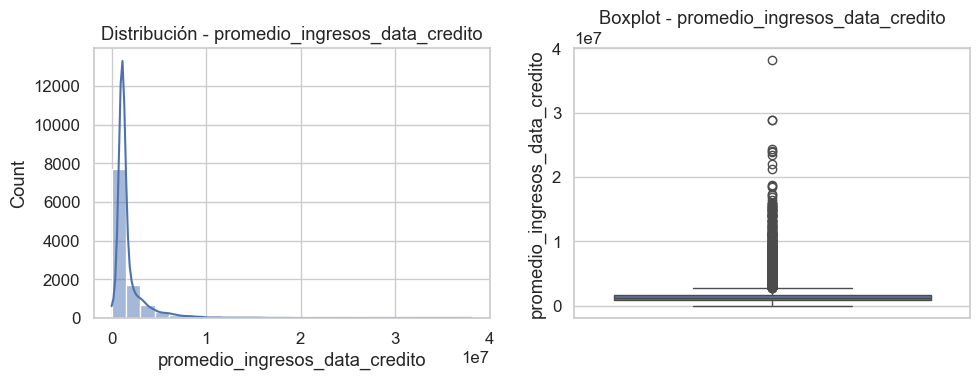

,count,mean,std,min,25%,50%,75%,max
capital_prestado,"10,763.00","2,434,315.00","1,909,642.76","360,000.00","1,224,831.00","1,921,920.00","3,084,840.00","41,444,152.80"
plazo_meses,"10,763.00",10.58,6.63,2.00,6.00,10.00,12.00,90.00
edad_cliente,"10,763.00",43.95,15.06,19.00,33.00,42.00,53.00,123.00
salario_cliente,"10,763.00","17,216,431.46","355,476,717.60",0.00,"2,000,000.00","3,000,000.00","4,875,808.00","22,000,000,000.00"
total_otros_prestamos,"10,763.00","6,238,869.65","118,418,316.94",0.00,"500,000.00","1,000,000.00","2,000,000.00","6,787,675,263.00"
cuota_pactada,"10,763.00","243,617.41","210,493.69","23,944.00","121,041.50","182,863.00","287,833.50","3,816,752.00"
puntaje,"10,763.00",91.17,16.47,-38.01,95.23,95.23,95.23,95.23
puntaje_data_credito,"10,763.00",780.80,104.85,-7.00,757.00,791.00,825.00,999.00
cant_creditos_vigentes,"10,763.00",5.73,3.98,0.00,3.00,5.00,8.00,62.00
huella_consulta,"10,763.00",4.23,3.06,0.00,2.00,4.00,6.00,29.00


In [27]:
# Numéricas: Histograma + Boxplot
display(df[num_cols].describe().T)

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  

    # Histograma
    sns.histplot(df[col].dropna(), bins=25,kde=True, ax=axes[0])
    axes[0].set_title(f"Distribución - {col}")
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(y=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()

    # Numéricas: Histograma + Boxplot
display(df[num_cols].describe().T)


In [28]:
#Sacar porcentaje de outliers
cols_outliers = df[num_cols]

outlier_stats = {}

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    pct_outliers = 100 * len(outliers) / len(df)
    
    outlier_stats[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower_limit": lower,
        "Upper_limit": upper,
        "Outlier_count": len(outliers),
        "Outlier_%": round(pct_outliers, 2)
    }

outlier_df = pd.DataFrame(outlier_stats).T
print(outlier_df)

                                         Q1           Q3          IQR  \
capital_prestado               1,224,831.00 3,084,840.00 1,860,009.00   
plazo_meses                            6.00        12.00         6.00   
edad_cliente                          33.00        53.00        20.00   
salario_cliente                2,000,000.00 4,875,808.00 2,875,808.00   
total_otros_prestamos            500,000.00 2,000,000.00 1,500,000.00   
cuota_pactada                    121,041.50   287,833.50   166,792.00   
puntaje                               95.23        95.23         0.00   
puntaje_data_credito                 757.00       825.00        68.00   
cant_creditos_vigentes                 3.00         8.00         5.00   
huella_consulta                        2.00         6.00         4.00   
saldo_mora                             0.00         0.00         0.00   
saldo_total                        2,570.00    52,156.00    49,586.00   
saldo_principal                    2,008.00    45,2

+ La mayoría de variables monetarias (`capital_prestado`, `salario_cliente`, `total_otros_prestamos`, `cuota_pactada`, `saldo_total`, `saldo_principal`, `promedio_ingresos_data_credito`) muestran fuerte asimetría positiva (cola derecha) y muchos outliers en los boxplots.

+ Variables como `saldo_mora` y `saldo_mora_codeudor` tienen gran concentración en 0 y pocos casos con valores altos, lo que sugiere que la “mora” es un evento raro pero relevante.

+ `plazo_meses` se concentra principalmente en 6–12 meses, con algunos plazos atípicos (outliers) que conviene revisar.

+ `edad_cliente` presenta una distribución razonable (adultos) pero aparecen valores extremos (≈120+), errores a validar.

+ `cant_creditos_vigentes` y `huella_consulta` se concentran en valores bajos con cola derecha, mostrando clientes con alta actividad/endeudamiento como outliers potencialmente informativos.

+ En `puntaje` aparece muy concentrado cerca del máximo y `puntaje_data_credito` es más estable pero con outliers bajos, que pueden representar casos sin historial o inconsistencias.

##### Las variables monetarias presentan fuerte asimetría positiva y colas largas, los histogramas en escala original quedan “aplastados” y no permiten ver bien la distribución del grueso de los datos. Por eso se muestran gráficos crudos vs log1p, para reducir el efecto visual de los outliers, observar mejor la forma real de la distribución.

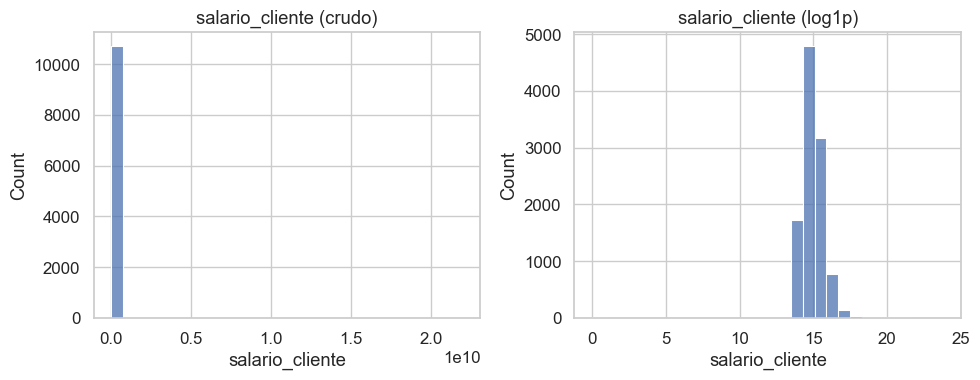

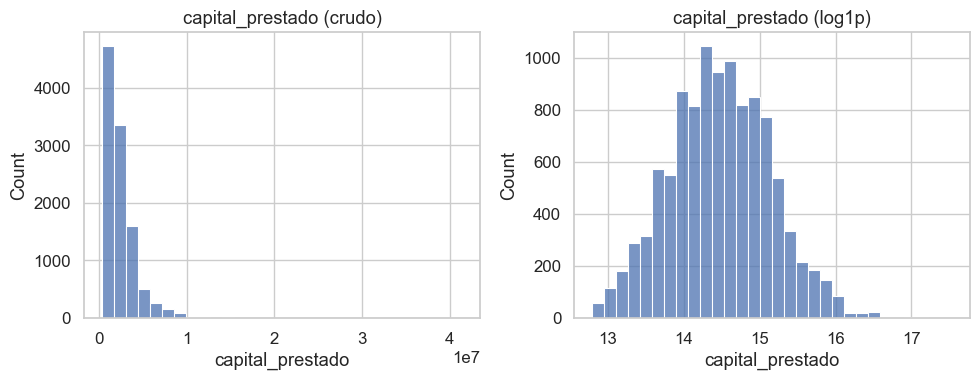

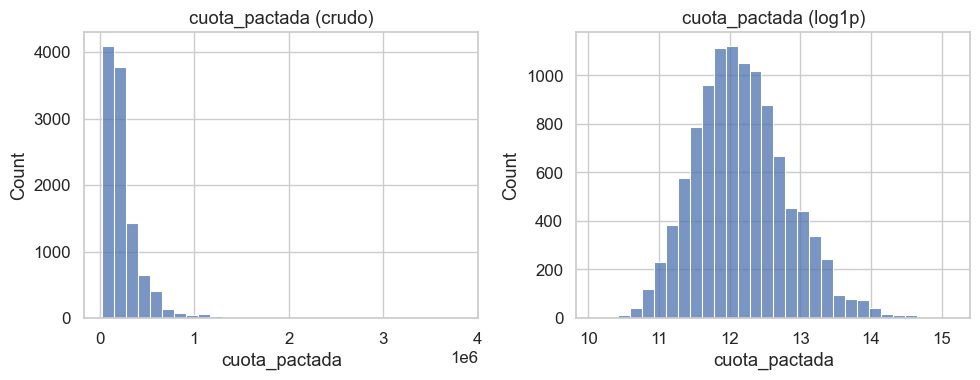

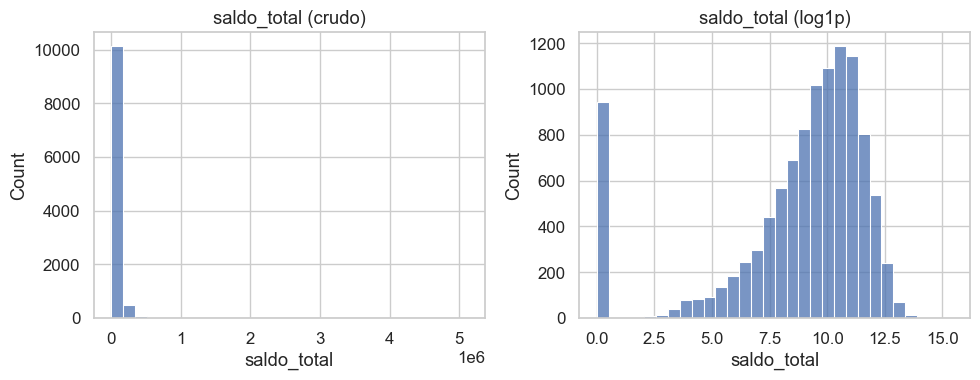

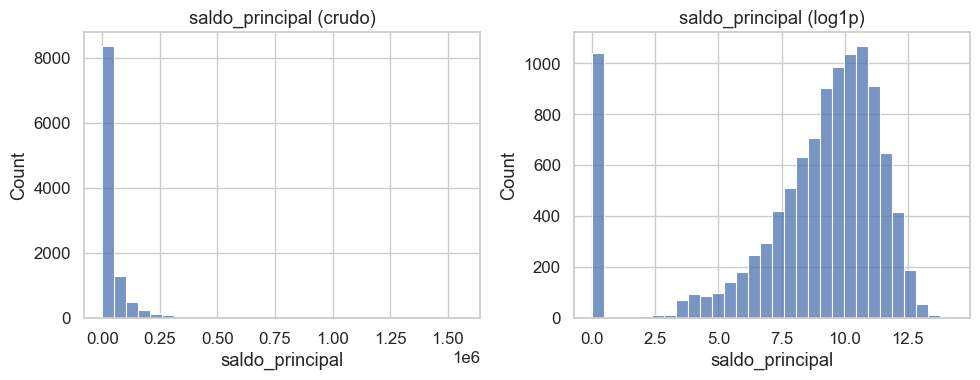

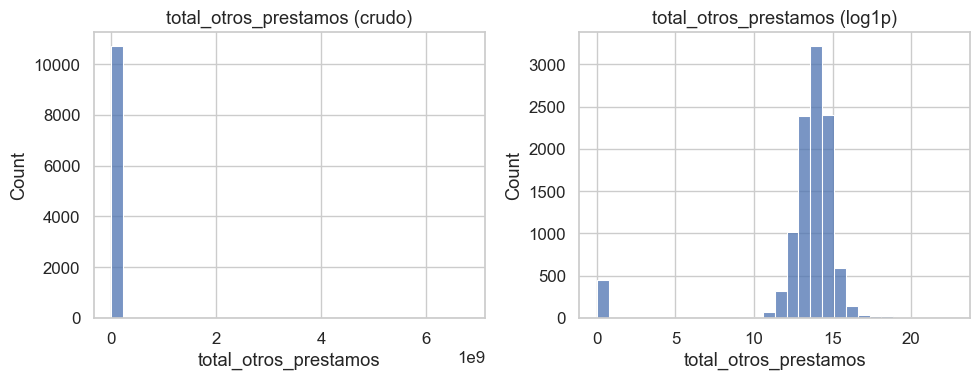

In [29]:
money_cols = ["salario_cliente","capital_prestado","cuota_pactada","saldo_total","saldo_principal","total_otros_prestamos"]

for col in money_cols:
    if col in df.columns:
        fig, axes = plt.subplots(1,2, figsize=(10,4))

        sns.histplot(df[col].dropna(), bins=30, ax=axes[0])
        axes[0].set_title(f"{col} (crudo)")

        sns.histplot(np.log1p(df[col].clip(lower=0)).dropna(), bins=30, ax=axes[1])
        axes[1].set_title(f"{col} (log1p)")

        plt.tight_layout()
        plt.show()

In [30]:
# Edad_cliente de 123 años
col = "edad_cliente"

# Guardar casos afectados para trazabilidad
edad_invalidos = df.loc[(df[col].isnull()) | (df[col] <= 0) | (df[col] >= 80), [col]].copy()

# Setear a NA fuera de rango razonable
df.loc[(df[col] <= 0) | (df[col] >= 80), col] = pd.NA

print("Registros ajustados a NA:", len(edad_invalidos))
display(edad_invalidos.head())

Registros ajustados a NA: 150


,edad_cliente
7008,122
7009,122
7010,122
7011,122
7012,122


In [31]:
# Imputación de edad_cliente con mediana 
col = "edad_cliente"

# imputar con mediana
df[col] = df[col].fillna(df[col].median())

print("Imputación aplicada.")
print("Nulos restantes en edad_cliente:", df[col].isna().sum())
print("Mediana usada:", df[col].median())

Imputación aplicada.
Nulos restantes en edad_cliente: 0
Mediana usada: 42.0


##### Se observa en el boxplot que las edades > 80 quedan fuera del rango típico (bigotes ~hasta 70) y aparecen como outliers (≈120). Por ello, se definió un umbral de 80 años y se aplicó una regla de negocio (edad válida 1–79), imputando como nulos los registros fuera de rango para evitar sesgos en el modelado. Luego, estos faltantes se imputaron con la mediana de la variable.



tipo_credito


,conteo,%
tipo_credito,,
4,7747,71.98
9,2876,26.72
10,116,1.08
6,21,0.20
7,2,0.02
68,1,0.01


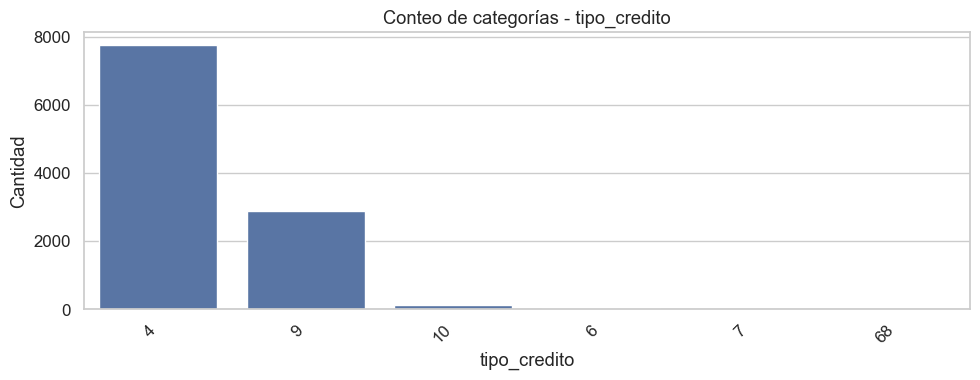


tipo_laboral


,conteo,%
tipo_laboral,,
empleado,6754,62.75
independiente,4009,37.25


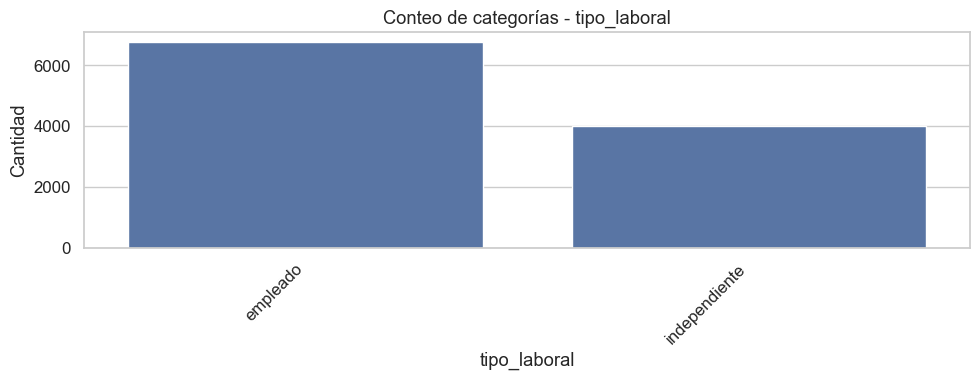


tendencia_ingresos


,conteo,%
tendencia_ingresos,,
creciente,5294,49.19
desconocido,2990,27.78
decreciente,1291,11.99
estable,1188,11.04


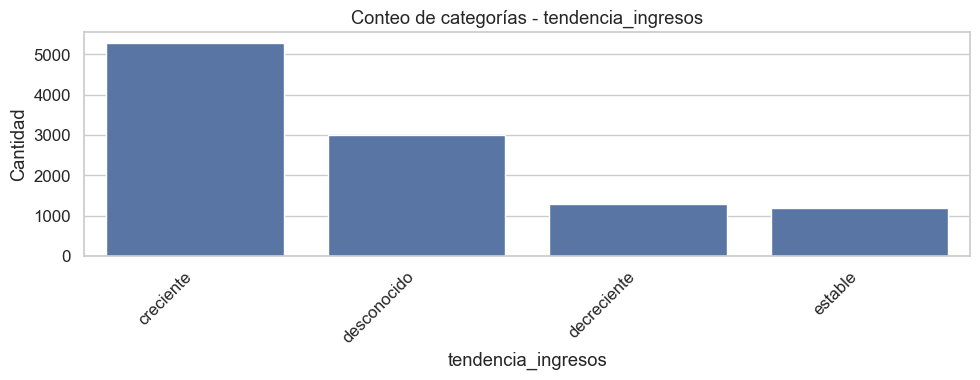

In [32]:
# Columnas categóricas
for col in cat_cols:
    # tabla conteos + %
    conteos = df[col].astype("string").value_counts(dropna=True)       
    porcentajes = (conteos / len(df) * 100).round(2)
    resumen_cat = pd.DataFrame({"conteo": conteos, "%": porcentajes})

    print(f"\n{col}")
    display(resumen_cat)

    # orden para el gráfico
    order = conteos.index.astype(str)

    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Conteo de categorías - {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

+ `tipo_credito`: variable está altamente concentrada en dos categorías: 4 (~72%) y 9 (~27%). El resto son clases muy raras (<1–2%), por lo que conviene considerar agruparlas en “otros” o evaluar su impacto para evitar ruido/overfitting.

+ `tipo_laboral`: distribución binaria relativamente balanceada: empleado (~63%) vs independiente (~37%). 

+ `tendencia_ingresos`: se observan cuatro categorías principales: creciente (~49%) y una proporción relevante de desconocido (~28%), además de decreciente (~12%) y estable (~11%).

In [33]:
# Agrupar categorías raras de tipo_credito en "otros"
col = "tipo_credito"

freq = df[col].value_counts(normalize=True) * 100
raras = freq[freq < 5].index  # <5%

df[col] = df[col].astype("string")
df.loc[df[col].isin(raras.astype("string")), col] = "otros"
df[col] = df[col].astype("category")

display((df[col].value_counts(normalize=True) * 100).round(2))

tipo_credito
4       71.98
9       26.72
otros    1.30
Name: proportion, dtype: float64

##### `tipo_credito` tenía categorías con muy poca frecuencia; se agruparon las clases <5% en “otros” para reducir ruido y mejorar la estabilidad del modelo.

#### **Resumen de análisis univariable**
+ fecha_prestamo va de 2024-11-26 a 2026-04-26 (mediana ~2025-03-27), útil para analizar efectos por período.

+ Variables monetarias (capital_prestado, salario_cliente, total_otros_prestamos, cuota_pactada, saldos) muestran fuerte asimetría positiva y muchos outliers → conviene usar log1p y/o tratamiento de extremos según el modelo.

+ plazo_meses se concentra en 6–12 (mediana 10), con outliers (máx 90).

+ edad_cliente tiene valores irreales (máx 123) → se aplicó regla 1–79, fuera de rango a nulos e imputación con mediana.

+ Mora/saldos: mucha concentración en 0 y pocos casos altos → evento raro pero relevante.

+ Target pago_a_tiempo está desbalanceado (~95% en 1) → priorizar Recall/F1/PR-AUC, evaluar class_weight y ajuste de umbral.

+ puntaje está casi constantizado (con mínimos negativos a validar); puntaje_data_credito más estable pero con outliers bajos.

+ Categóricas: tipo_credito muy concentrada (se agruparon clases <5% en “otros”); tipo_laboral relativamente balanceada; tendencia_ingresos con “desconocido” relevante.

En síntesis, el dataset presenta outliers y asimetría marcada en variables económicas, eventos raros en mora, y un target desbalanceado, por lo que el preprocesamiento (transformaciones, reglas de negocio, imputación) y la evaluación con métricas adecuadas serán claves para un modelado robusto.

### 2.2. Análisis bivariable


=== capital_prestado vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"2,781,774.11","2,268,000.00","1,942,337.70","408,000.00","11,808,000.00"
1,10252,"2,416,996.27","1,908,446.40","1,906,438.41","360,000.00","41,444,152.80"


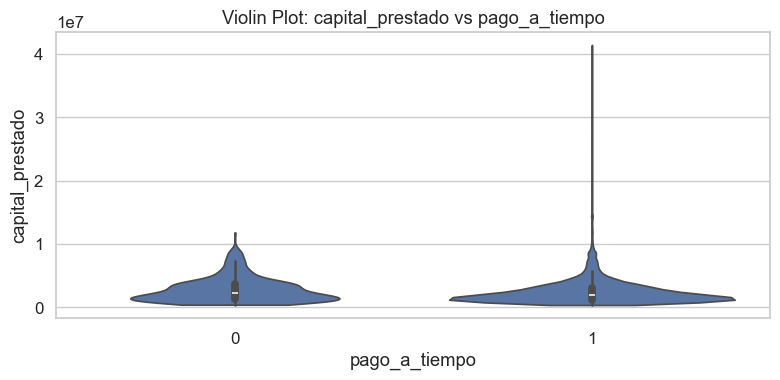


=== plazo_meses vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,12.45,10.00,9.27,2,36
1,10252,10.48,10.00,6.46,2,90


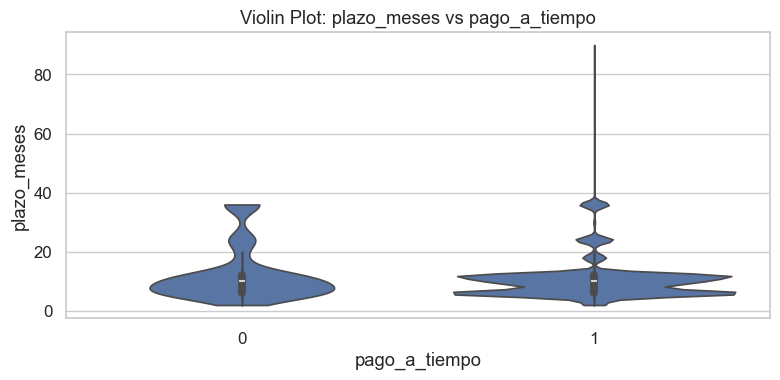


=== edad_cliente vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,40.05,38.00,12.22,20.00,69.00
1,10252,42.97,42.00,11.83,19.00,69.00


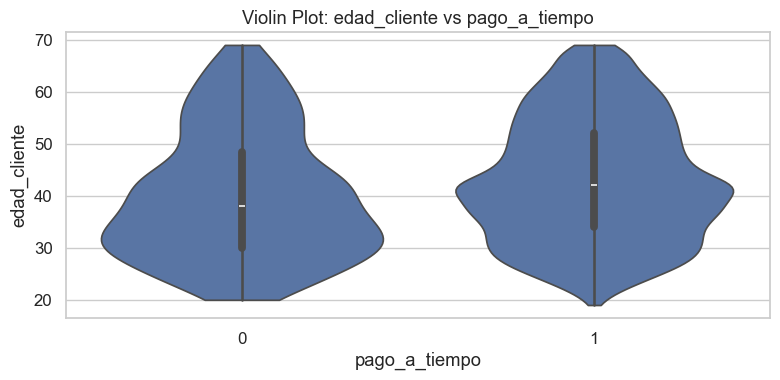


=== salario_cliente vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"23,555,143.33","3,000,000.00","274,787,635.68",0,4663274549
1,10252,"16,900,485.13","3,000,000.00","359,032,091.87",0,22000000000


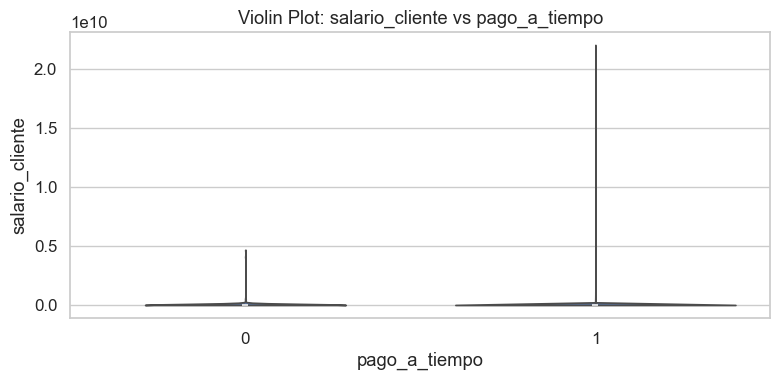


=== total_otros_prestamos vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"11,564,401.93","900,000.00","178,148,935.52",0,3918433000
1,10252,"5,973,424.18","1,000,000.00","114,636,297.61",0,6787675263


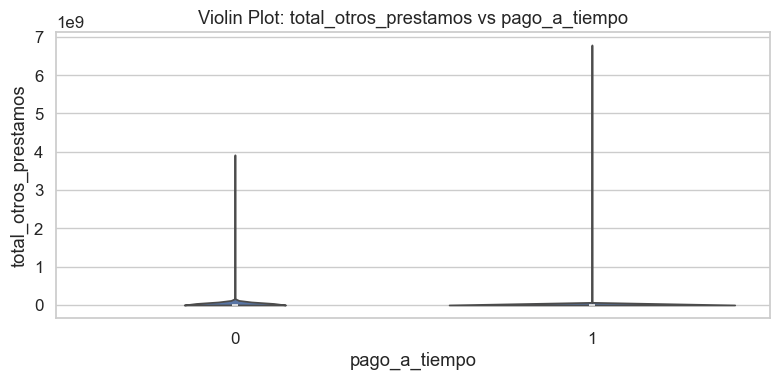


=== cuota_pactada vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"254,755.69","199,002.00","201,712.00",37586,1500131
1,10252,"243,062.23","182,576.00","210,915.90",23944,3816752


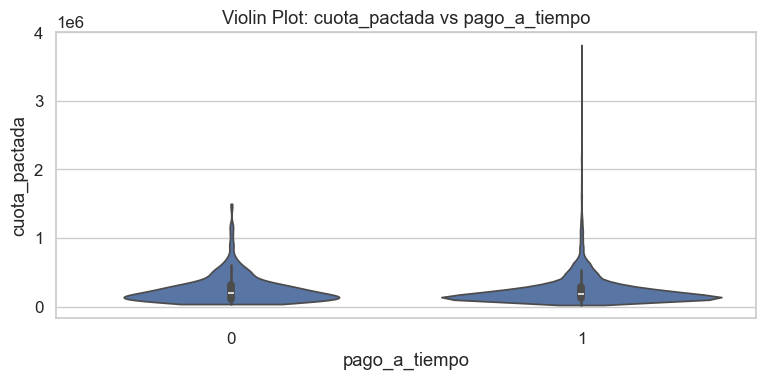


=== puntaje vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,23.09,25.42,26.07,-38.01,62.67
1,10252,94.56,95.23,2.87,63.81,95.23


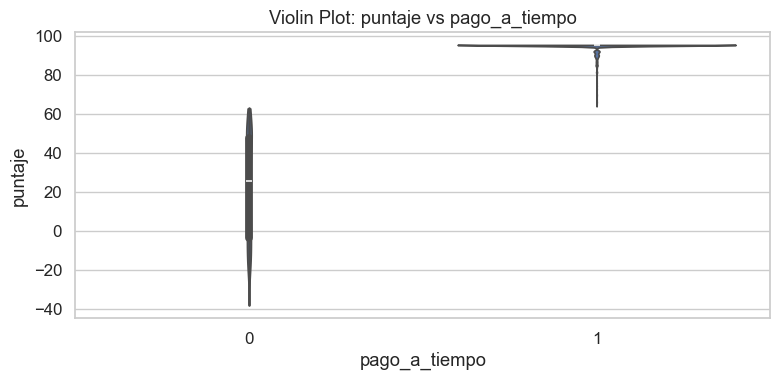


=== puntaje_data_credito vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,748.96,768.00,130.80,0.00,922.00
1,10252,782.38,792.00,103.14,-7.00,999.00


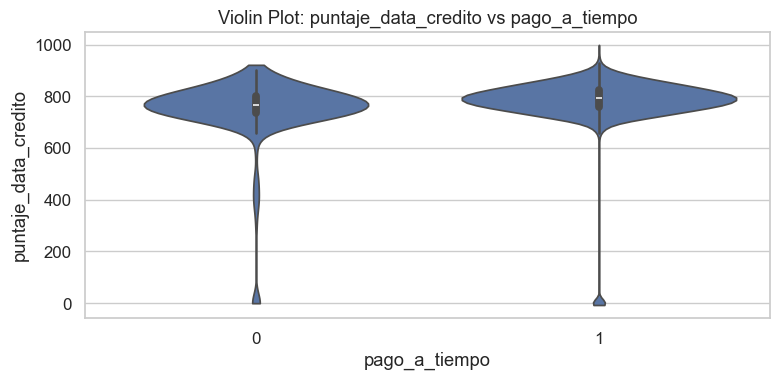


=== cant_creditos_vigentes vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,5.57,5.00,4.14,0,26
1,10252,5.73,5.00,3.97,0,62


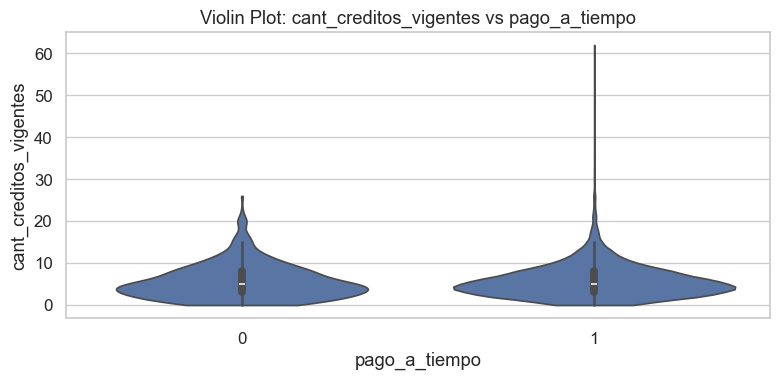


=== huella_consulta vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,5.24,5.00,3.45,0,19
1,10252,4.18,4.00,3.04,0,29


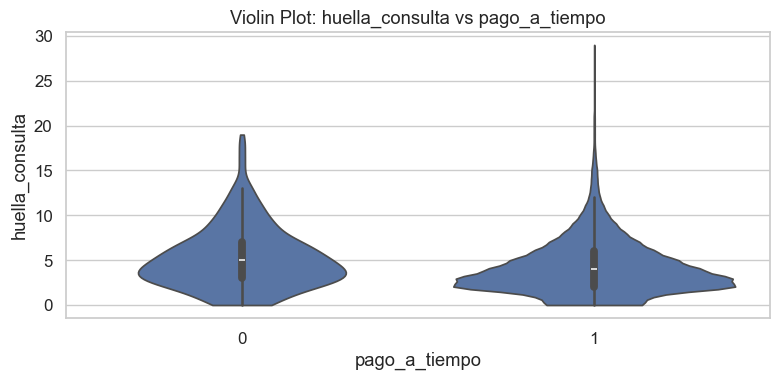


=== saldo_mora vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,80.59,0.00,714.82,0.00,"12,534.00"
1,10252,4.00,0.00,164.70,0.00,"10,327.00"


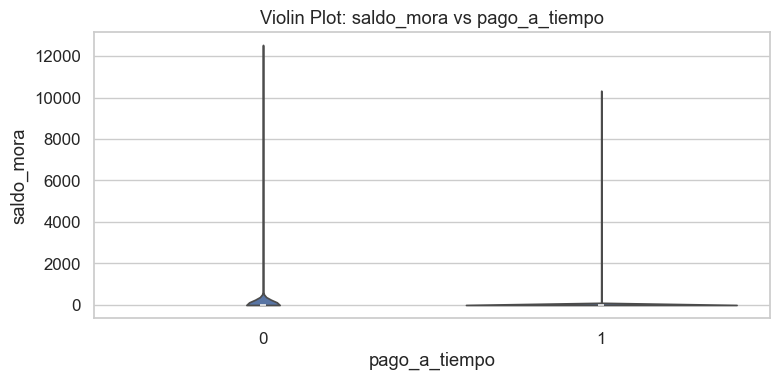


=== saldo_total vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"38,233.78","13,656.00","62,955.17",0.00,"445,295.00"
1,10252,"45,622.38","15,737.50","107,313.73",0.00,"5,116,066.00"


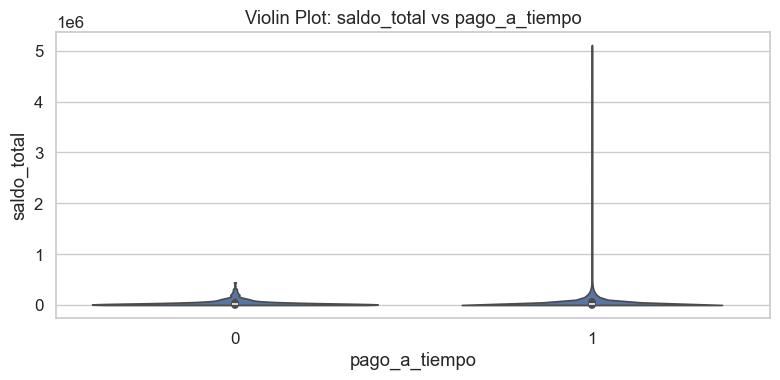


=== saldo_principal vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"34,566.69","11,478.00","58,963.58",0.00,"445,295.00"
1,10252,"39,040.39","13,074.50","70,823.30",0.00,"1,562,285.00"


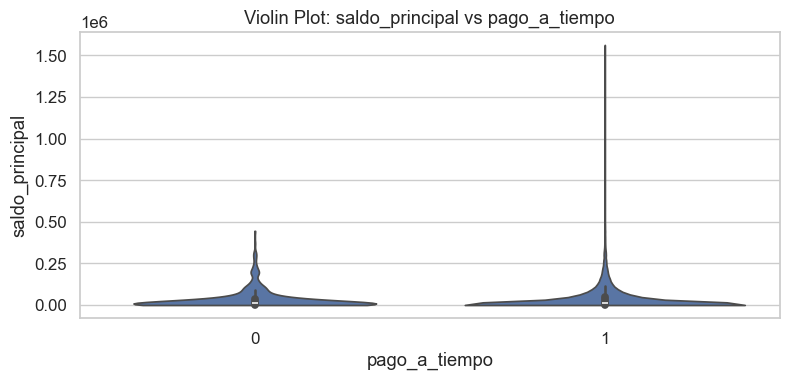


=== saldo_mora_codeudor vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,0.00,0.00,0.00,0.00,0.00
1,10252,0.26,0.00,21.69,0.00,"2,145.00"


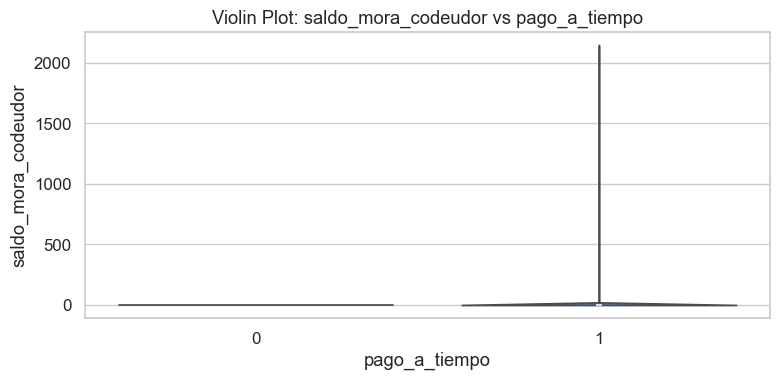


=== creditos_sector_financiero vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,2.52,2.00,2.64,0,19
1,10252,2.79,2.00,2.75,0,51


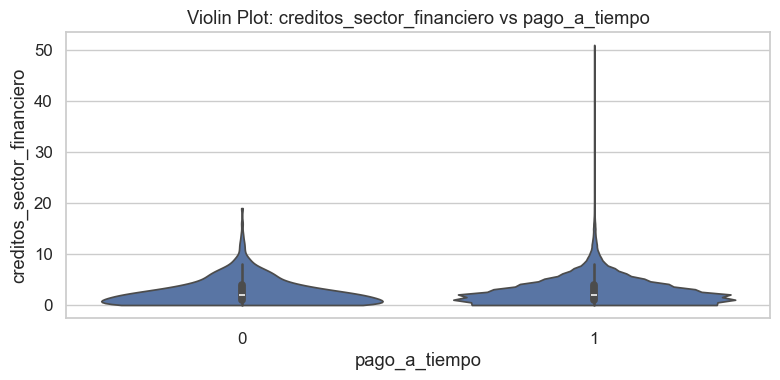


=== creditos_sector_cooperativo vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,0.20,0.00,0.62,0,6
1,10252,0.27,0.00,0.72,0,13


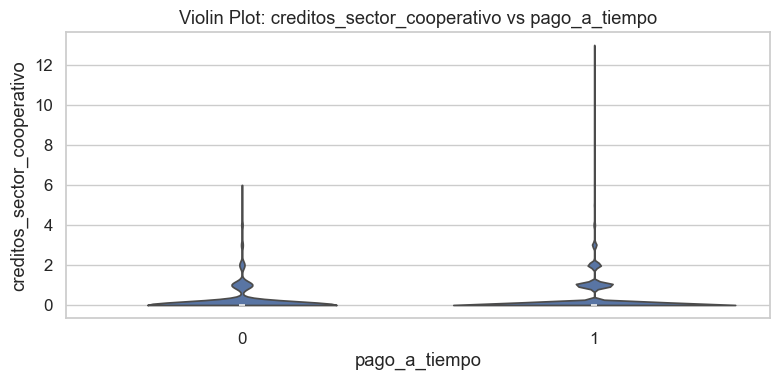


=== creditos_sector_real vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,1.49,1.00,2.05,0,15
1,10252,1.29,1.00,1.81,0,25


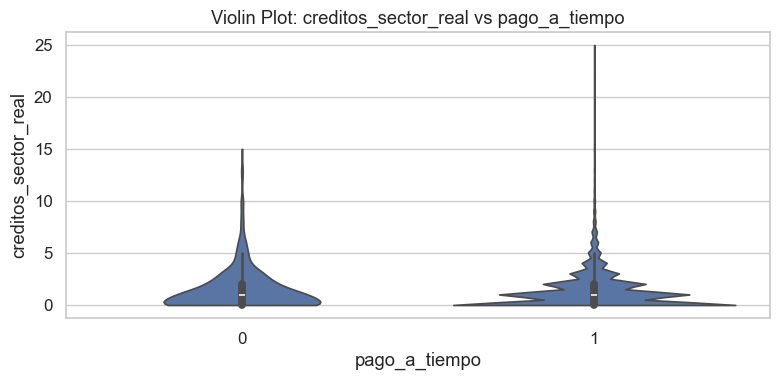


=== promedio_ingresos_data_credito vs pago_a_tiempo ===


,count,mean,median,std,min,max
pago_a_tiempo,,,,,,
0,511,"1,473,825.54","1,204,496.00","1,379,609.19","30,285.00","18,727,755.00"
1,10252,"1,802,813.28","1,204,496.00","1,883,058.95",0.00,"38,106,581.00"


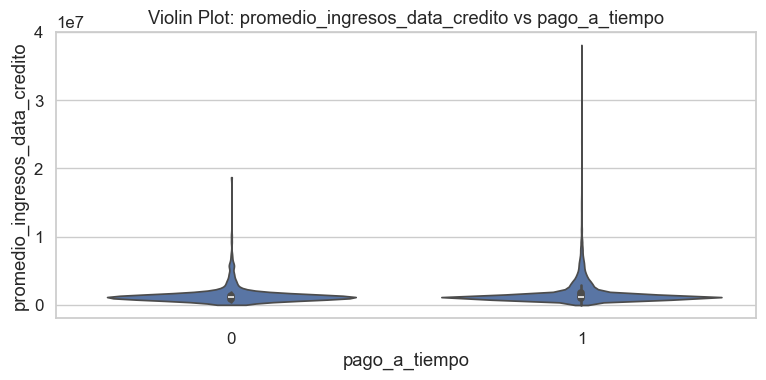

In [34]:
# 1) Numéricas vs target
order_target = sorted(df[target].dropna().unique())

for col in num_cols:
    tmp = df[[col, target]].dropna()

    print(f"\n=== {col} vs {target} ===")
    resumen = tmp.groupby(target)[col].agg(["count", "mean", "median", "std", "min", "max"]).round(2)
    display(resumen)

    plt.figure(figsize=(8, 4))
    sns.violinplot(data=tmp, x=target, y=col, order=order_target, cut=0)
    plt.title(f"Violin Plot: {col} vs {target}")
    plt.tight_layout()
    plt.show()

+ `capital_prestado`: hay mucho solapamiento entre clases (0 y 1), por lo que no discrimina fuerte por sí sola, la mediana es algo mayor en no pago (0) que en pago (1), pero la diferencia es moderada. En pago_a_tiempo=1 aparecen outliers muy grandes (cola larga) que inflan el máximo.

+ `plazo_meses`: Medianas iguales (10 meses) → diferencia central baja, pago_a_tiempo=1 muestra mayor rango/cola (hasta 90) mientras que 0 llega a 36.

+ `edad_cliente`: quienes pagan a tiempo tienden a ser ligeramente mayores (mediana ~42 vs ~38). Solapamiento alto → no separa claramente por sí sola.

+ `salario_cliente`: Distribución extremadamente sesgada y dominada por outliers gigantes. Medianas iguales → poca diferencia real en el centro. Requiere transformación / control de outliers.

+ `total_otros_prestamos`: Medianas similares → diferencias pequeñas. Outliers altos en ambas clases (colas largas).

+ `cuota_pactada`: Mediana y media levemente mayores en no pago (0), pero con solapamiento alto. En pago_a_tiempo=1 hay outliers más grandes (máximo mayor).

+ `puntaje`: Mayor poder de separación: pago_a_tiempo=1 se concentra cerca de ~95 con baja dispersión; pago_a_tiempo=0 es mucho más bajo y muy disperso.

+ `puntaje_data_credito`: Mejor score se asocia a pago_a_tiempo=1 (mediana y media más altas). Diferencia clara, aunque menor que puntaje.

+ cant_creditos_vigentes: Medianas iguales (5) y diferencias mínimas. Mucho solapamiento.

+ `huella_consulta`: Mayor número de consultas en no pago (0): media y mediana más altas. Más consultas puede reflejar mayor riesgo o mayor búsqueda de crédito.

+ `saldo_mora`: Mediana 0 en ambos grupos (cero-inflada), No pago (0) tiene mayor media y outliers más altos → cuando hay mora, se asocia a peor pago.Puede ser útil como binaria (tiene_mora)

+ `saldo_total` / `saldo_principal`: pago_a_tiempo=1 presenta medias/medianas ligeramente mayores. Solapamiento fuerte y outliers.

+ `saldo_mora_codeudor`: asi siempre 0; pocos valores >0 (muy sparse). Señal débil; evaluar binarizar o incluso descartar.

+ Créditos por sector (`creditos_sector_financiero`, `creditos_sector_cooperativo`, `creditos_sector_real`) Diferencias pequeñas y alto solapamiento.

+ `promedio_ingresos_data_credito`: Medianas iguales; media mayor en pago_a_tiempo=1 por cola/outliers. Conviene transformación y uso junto a score/huella/mora.

pago_a_tiempo,0,1
tipo_credito,,
4,363,7384
9,136,2740
otros,12,128


pago_a_tiempo,0,1
tipo_credito,,
4,4.69,95.31
9,4.73,95.27
otros,8.57,91.43


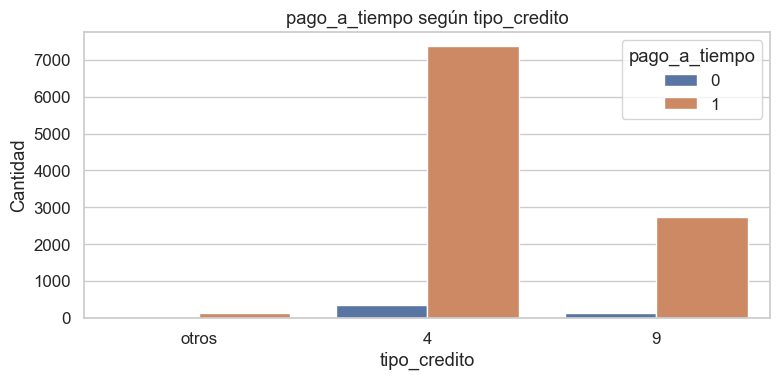

pago_a_tiempo,0,1
tipo_laboral,,
empleado,290,6464
independiente,221,3788


pago_a_tiempo,0,1
tipo_laboral,,
empleado,4.29,95.71
independiente,5.51,94.49


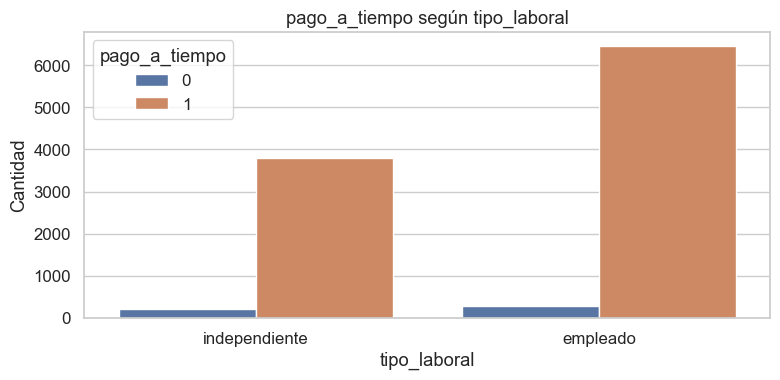

pago_a_tiempo,0,1
tendencia_ingresos,,
creciente,207,5087
decreciente,81,1210
desconocido,168,2822
estable,55,1133


pago_a_tiempo,0,1
tendencia_ingresos,,
creciente,3.91,96.09
decreciente,6.27,93.73
desconocido,5.62,94.38
estable,4.63,95.37


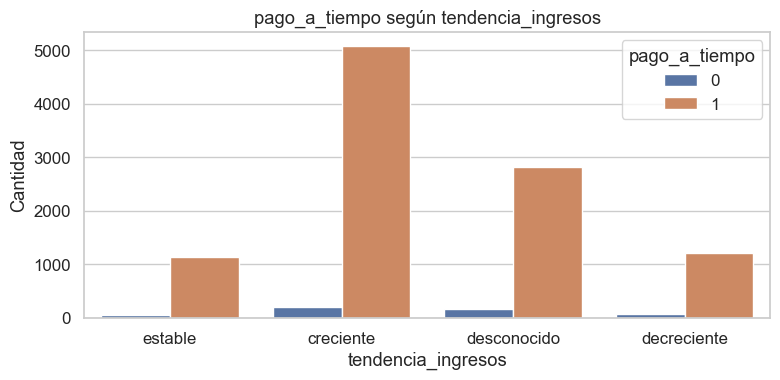

In [35]:
# Categóricas vs target 
for col in cat_cols:
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].astype("string").fillna("Missing")

    # 1) tabla cruzada (conteos)
    display(pd.crosstab(tmp[col], tmp[target]))

    # 2) tabla cruzada (% por fila)
    display((pd.crosstab(tmp[col], tmp[target], normalize="index") * 100).round(2))

    # 3) gráfico (conteos)
    plt.figure(figsize=(8, 4))
    sns.countplot(data=tmp, x=col, hue=target)
    plt.title(f"{target} según {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

+ `tipo_credito`: Categorías 4 y 9 tienen tasas de pago a tiempo muy similares (~95%). “otros” muestra peor desempeño: ~91.4% paga a tiempo (mayor proporción de 0).

+ `tipo_laboral`: Empleado paga a tiempo un poco más (95.7%) que independiente (94.5%). Diferencia leve pero consistente: independencia podría implicar mayor variabilidad de ingresos.

+ `tendencia_ingresos`: Creciente es el mejor perfil (96.1% a tiempo), decreciente es el más riesgoso (93.7% a tiempo), “Desconocido” queda intermedio (94.4%). Variable muy útil como señal de estabilidad: ingresos decrecientes elevan el riesgo.

#### **Resumen de análisis bivariable**
+ Señales más predictivas: puntaje (principal) y puntaje_data_credito separan claramente: mejores scores ⇒ mayor probabilidad de pagar a tiempo.

+ Riesgo operativo: huella_consulta más alta y presencia de saldo_mora (aunque sea cero-inflada) se asocian a no pago; conviene crear tiene_mora (binaria).

+ Señal moderada: tendencia_ingresos (decreciente = más riesgo), tipo_credito (categoría “otros” peor), tipo_laboral (independiente levemente más riesgoso) y edad_cliente (pagadores algo mayores, pero con solapamiento).

+ Débiles por sí solas: capital_prestado, plazo_meses, cuota_pactada, cant_creditos_vigentes, total_otros_prestamos, sectores y saldo_total/principal muestran mucho solapamiento.

+ Para modelado: tratar outliers/colas largas (salario_cliente, promedio_ingresos_data_credito, capital/cuota/saldos) con log/clipping; saldo_mora_codeudor es muy sparse ⇒ binarizar o descartar.

### 2.3. Análisis multivariable

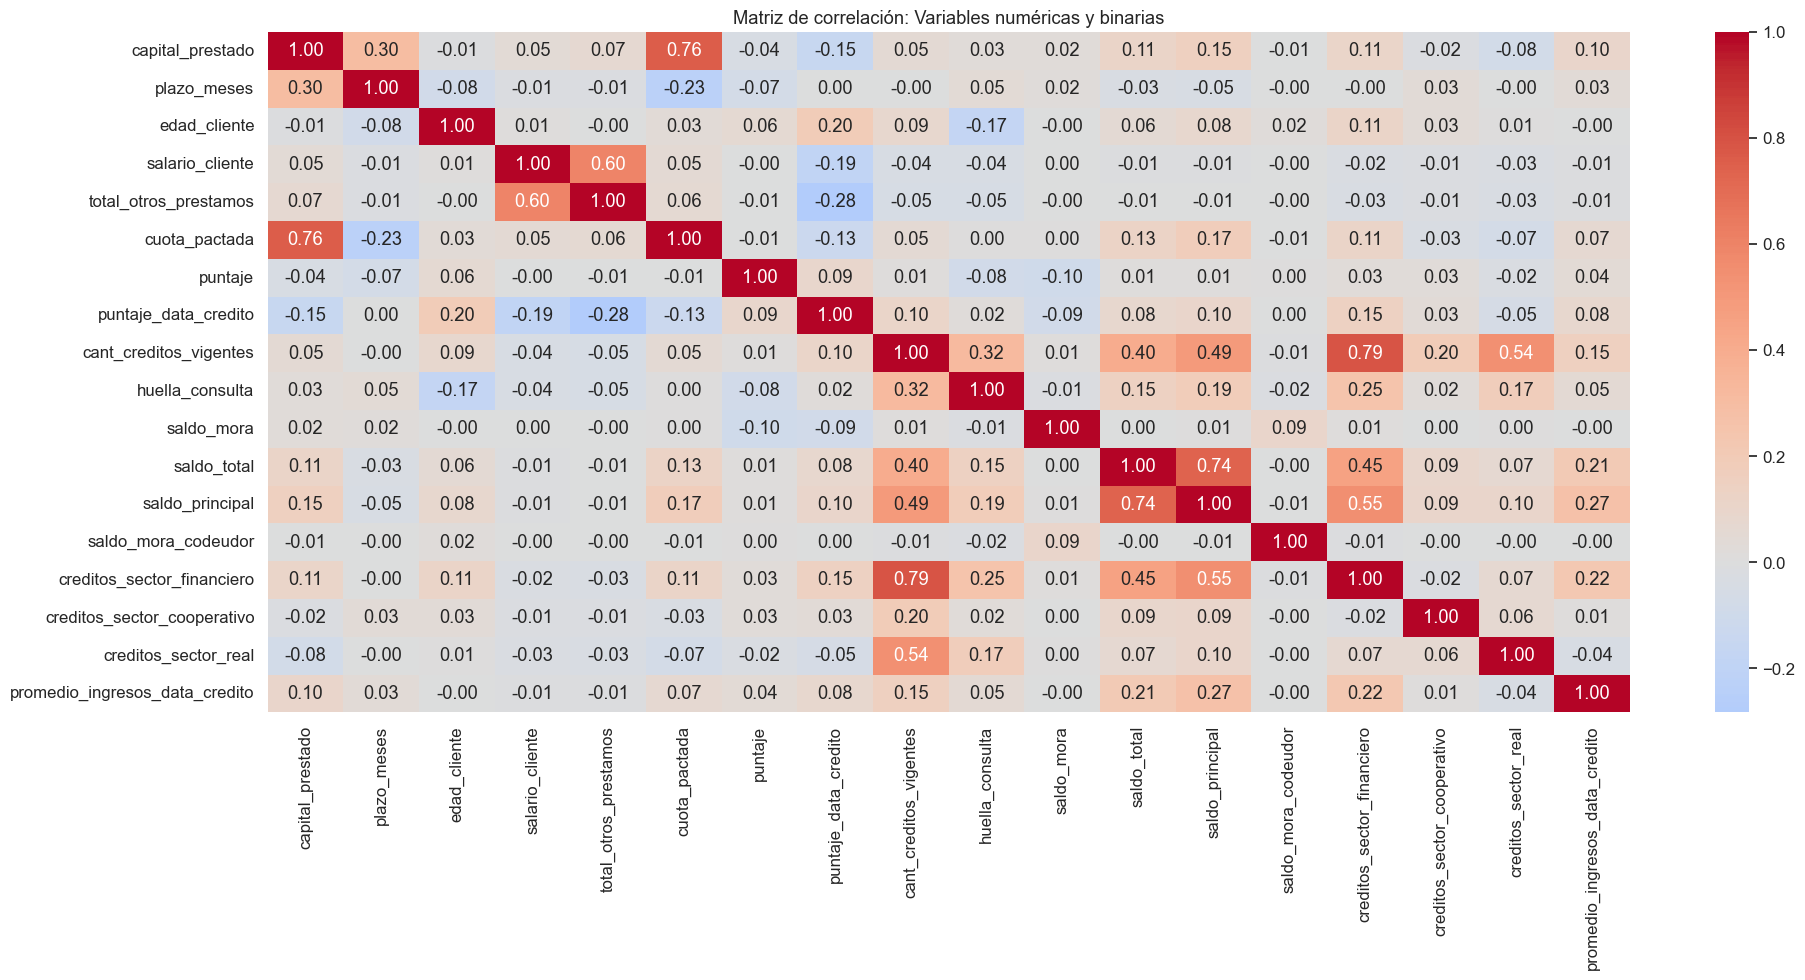

In [36]:
# Relación entre variables
cols_corr = num_cols

corr = df[cols_corr].corr()

plt.figure(figsize=(20,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de correlación: Variables numéricas y binarias")
plt.tight_layout()
plt.show()

### A destacar:
Se observan relaciones más fuertes entre:
+ `cant_creditos_vigentes` y `creditos_sector_financiero` (r = 0.79)

+ `saldo_principal` y `saldo_total` (r = 0.74)

+ `capital_prestado` y `cuota_pactada` (r = 0.76)

+ `salario_cliente` y `total_otros_prestamos` (r = 60)

Se observan relaciones moderadas entre:
+ `cant_creditos_vigentes` y `saldo principal`

+ `saldo_principal` y `credito_sector_financiero`

+ `cant_creditos_vigente` y `creditos_sector_real`



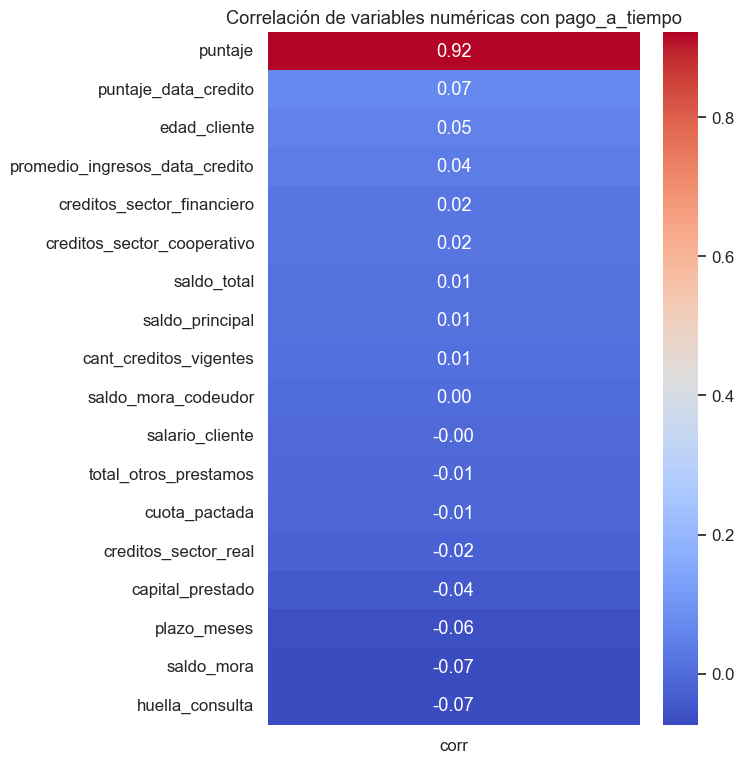

In [37]:
# Calcular correlación solo con 'pago_a_tiempo'
df_numeric = df.select_dtypes(include=[np.number])

# Convertir a DataFrame para heatmap
corr_target = df_numeric.corr()['pago_a_tiempo'].sort_values(ascending=False)
corr_target_df = corr_target.drop('pago_a_tiempo').to_frame(name='corr')


# Graficar heatmap
plt.figure(figsize=(6, len(corr_target_df)*0.5))
sns.heatmap(corr_target_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlación de variables numéricas con pago_a_tiempo")
plt.show()

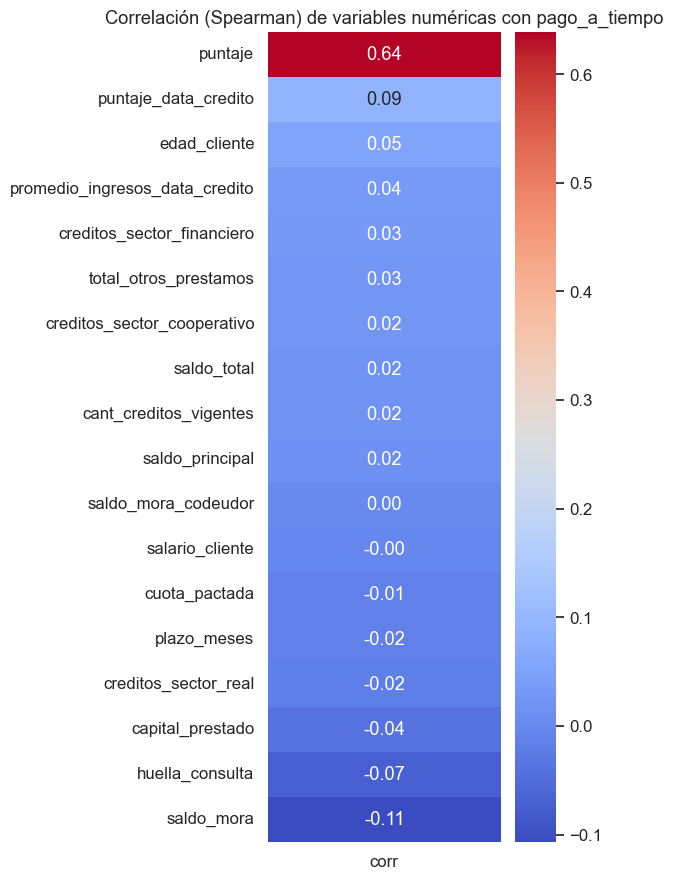

In [41]:
# Calcular correlación (Spearman) solo con 'pago_a_tiempo'
df_numeric = df.select_dtypes(include=[np.number])

corr_target = (
    df_numeric.corr(method="spearman")["pago_a_tiempo"]
    .sort_values(ascending=False)
)

corr_target_df = corr_target.drop("pago_a_tiempo").to_frame(name="corr")

# Graficar heatmap
plt.figure(figsize=(6, max(4, len(corr_target_df) * 0.5)))
sns.heatmap(corr_target_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlación (Spearman) de variables numéricas con pago_a_tiempo")
plt.tight_layout()
plt.show()

+ #####  Con Pearson, puntaje muestra una asociación muy alta con el target (≈0.92), pero al usar Spearman (robusto a outliers y no linealidad) baja a ≈ 0.64, lo que sugiere que la relación es fuerte pero no estrictamente lineal y existe solapamiento entre clases.

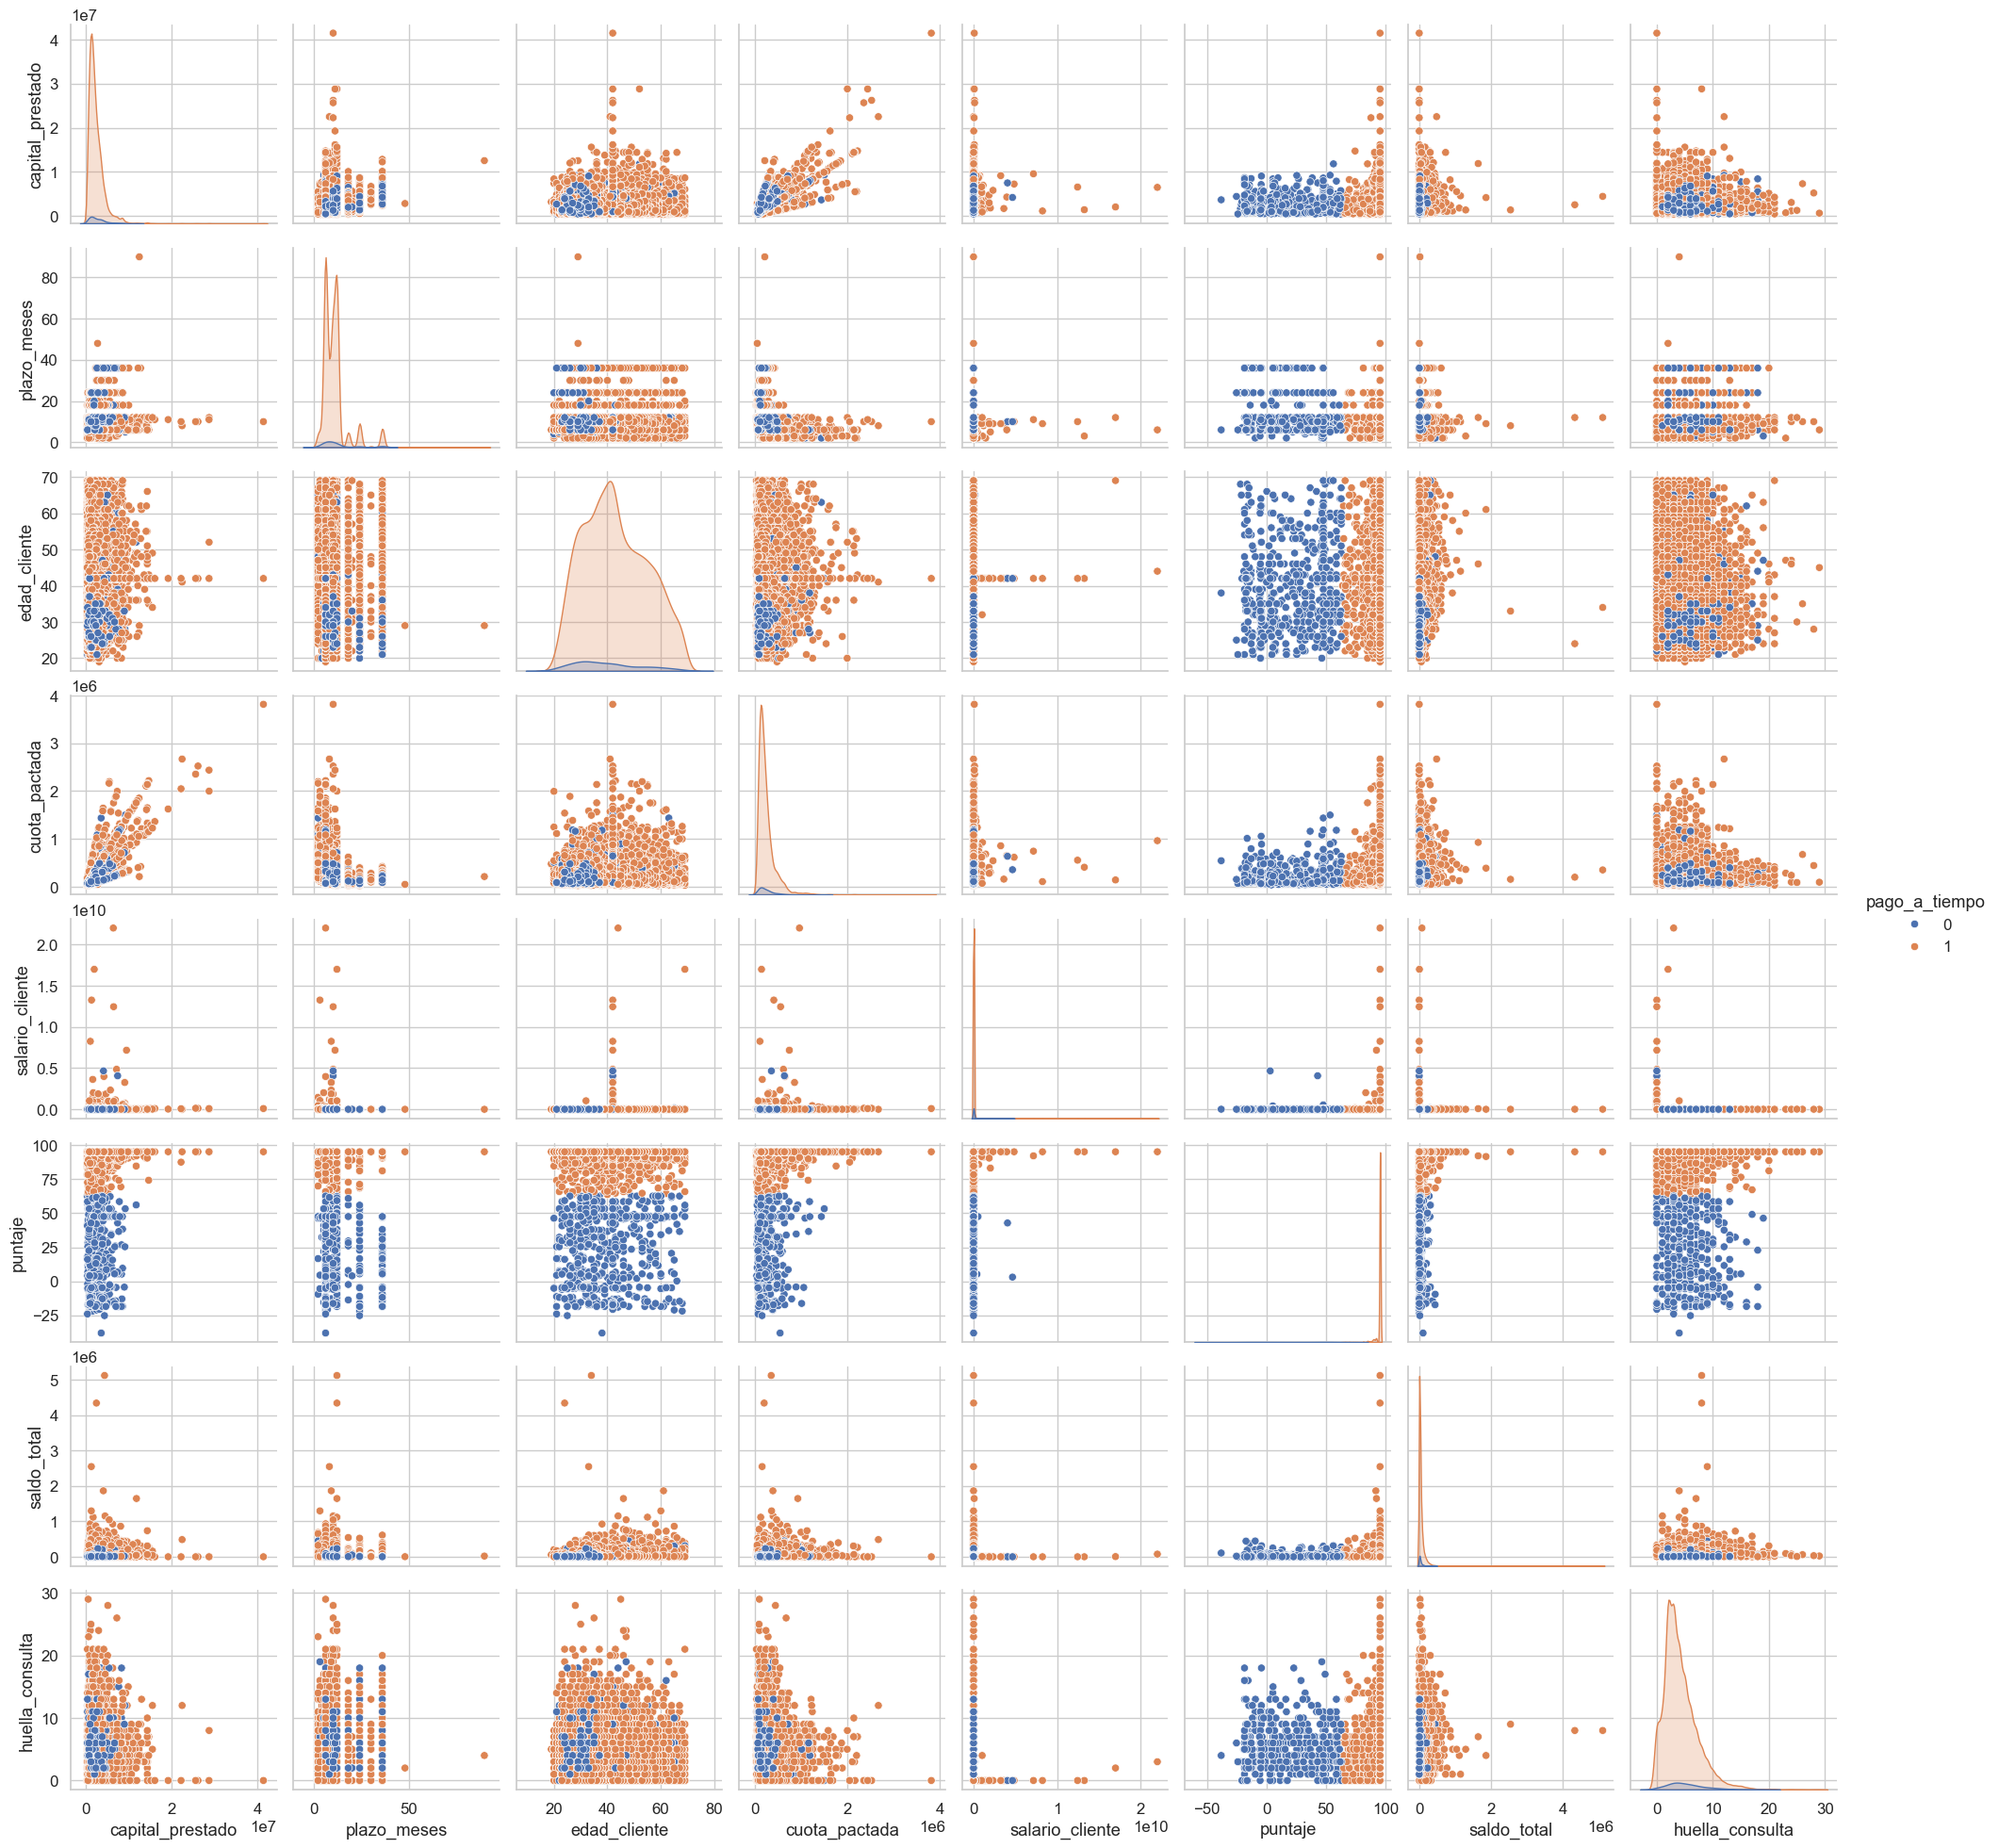

In [38]:
cols_pairplot = [
    "capital_prestado",
    "plazo_meses",
    "edad_cliente",
    "tipo_laboral",
    "cuota_pactada",
    "salario_cliente",
    "puntaje",
    "saldo_total",
    "huella_consulta",
    "tendencia_ingresos",
    "pago_a_tiempo"
]

sns.pairplot(df[cols_pairplot], hue="pago_a_tiempo")
plt.show()

##### A destacar:

+ `puntaje` es el principal factor de separación entre clases: se observa una segmentación muy marcada: los casos con pago_a_tiempo = 1 se concentran en valores altos de puntaje (cercanos a 90–100), mientras que pago_a_tiempo = 0 aparece con puntajes mucho más bajos y dispersos. Esto coincide con la correlación alta entre puntaje y el target.

+ entre `capital_prestado` y `cuota_pactada`: hay un patrón creciente claro (a mayor capital, mayor cuota), lo cual es esperable por estructura del préstamo. Sin embargo, no separa fuertemente entre pago_a_tiempo (ambas clases aparecen en rangos similares).

+ `plazo_meses` y `edad_cliente` muestran patrones discretos, pero sin separación nítida. Se ven “bandas” verticales/horizontales (valores discretizados), y aunque hay diferencias leves en densidad, no hay una frontera visual clara entre pago_a_tiempo = 0 y 1.

+ Variables como `capital_prestado`, `cuota_pactada`, `saldo_total` y `salario_cliente` están muy concentradas cerca de 0 con colas largas (outliers extremos). 

#### **Resumen de análisis multivariable**

+ Relaciones fuertes (posible colinealidad): cant_creditos_vigentes–creditos_sector_financiero (0.79), saldo_principal–saldo_total (0.74), capital_prestado–cuota_pactada (0.76) y salario_cliente–total_otros_prestamos (~0.60). En modelos lineales, conviene regularizar o dejar una variable por bloque para evitar multicolinealidad.

+ Señal principal hacia el target: puntaje es el factor más explicativo: con Pearson ≈ 0.92 y Spearman ≈ 0.64, sigue siendo fuerte, pero indica relación no estrictamente lineal y con solapamiento. Visualmente, pago_a_tiempo=1 se concentra en puntajes altos (90–100) y 0 es más bajo y disperso.

+ Relaciones estructurales sin separación: capital_prestado–cuota_pactada crece como se espera por diseño del crédito, pero no discrimina bien entre 0 y 1 (rangos compartidos).

+ Patrones discretos débiles: plazo_meses y edad_cliente muestran “bandas” por valores discretizados, sin frontera clara entre clases.

+ Distribuciones a tratar: capital_prestado, cuota_pactada, saldo_total y salario_cliente están muy concentradas en valores bajos con colas largas/outliers → para modelar, aplicar log1p / clipping y evaluar features binarias (p.ej., “tiene_saldo”, “tiene_mora”)


### 3. Conclusiones

Durante el EDA se identificó un fuerte desbalance de clases: la gran mayoría de registros corresponde a pago_a_tiempo = 1, mientras que 0 es minoritario. Esto obliga a interpretar comparaciones con cautela, ya que el grupo minoritario puede magnificar outliers y volver algunas conclusiones sensibles al muestreo.

1) Variables numéricas con mayor señal frente al target

`puntaje` es el principal factor diferenciador: se observa una separación marcada entre clases. Los pagos a tiempo se concentran en valores altos, mientras los no pagadores aparecen con valores más bajos y más dispersos.

`puntaje_data_credito` aporta señal, pero más moderada, con mayor solapamiento entre clases.

`huella_consulta` y `saldo_mora` se comportan en la dirección esperada: más consultas y presencia/monto de mora se asocian a peor pago, aunque sus distribuciones son sesgadas y dominadas por valores extremos.

Las variables monetarias (`capital_prestado`, `cuota_pactada`, `saldo_total`, `saldo_principal`, `total_otros_prestamos`) presentan asimetría fuerte, colas largas y outliers extremos, por lo que la mediana es más representativa que la media. Además, por sí solas muestran baja capacidad de separación o resultados condicionados por casos extremos.

2) Relación entre variables (multivariable)

Se detectan bloques altamente correlacionados, indicando posible redundancia:

`capital_prestado` ↔ `cuota_pactada` (relación estructural esperable del crédito)

`saldo_principal` ↔ `saldo_total` (miden tamaño del saldo)

`cant_creditos_vigentes` ↔ `creditos_sector_financiero` (conteos con estructura similar)

Esto sugiere que el modelado puede beneficiarse de regularización, selección de variables o features derivados (p.ej., ratios) para evitar multicolinealidad en modelos lineales.

3) Variables categóricas y segmentación

`tendencia_ingresos` muestra un patrón consistente: la categoría decreciente concentra relativamente más no pago, mientras perfiles crecientes/estables se asocian a mejor desempeño. “Desconocido” es frecuente y debe tratarse como informativa.

`tipo_credito` muestra diferencias (destaca “otros” con peor desempeño relativo), pero su interpretación requiere cautela por posible baja frecuencia.

`tipo_laboral` presenta diferencias pequeñas (empleado vs independiente): no es driver principal, pero puede sumar señal en combinación.

4) Patrones clave en visualizaciones

Los pairplots y violin plots confirman dos puntos centrales:

`puntaje` es la variable que mejor separa el target.

Las variables monetarias están dominadas por outliers, “aplastando” la estructura real y dificultando detectar patrones finos sin transformaciones.

También se observan variables con inflación de ceros (especialmente relacionadas a mora), lo que sugiere que pueden funcionar mejor con flags (ej. tiene_mora) o transformaciones robustas antes que con valores crudos.

**Síntesis final**

En conjunto, el EDA indica que pago_a_tiempo está explicado principalmente por el score (puntaje), con aportes secundarios de actividad/mora (huella_consulta, saldo_mora). Las variables monetarias aportan contexto pero requieren tratamiento por outliers y asimetrías, y existe redundancia entre grupos de variables correlacionadas. Las categóricas aportan segmentación moderada (especialmente tendencia_ingresos) y complementan la señal principal. En próximas etapas será clave aplicar transformaciones robustas, tratar outliers y controlar posibles efectos del desbalance para asegurar conclusiones y modelos estables.

### 4. Recomendaciones para el Feature Engineering
+ Desbalance: split estratificado + usar class_weight y evaluar con PR-AUC / Recall / F1.

+ Outliers/colas largas (monetarias): aplicar log1p a salario_cliente, capital_prestado, cuota_pactada, saldo_total/principal, total_otros_prestamos, promedio_ingresos_data_credito.

+ Cero-infladas: crear flags: tiene_mora = saldo_mora>0, tiene_saldo = saldo_total>0; opcional mora_log. saldo_mora_codeudor → binarizar o descartar.

+ Redundancia/correlación alta: en modelos lineales, elegir 1 por bloque o regularizar: (saldo_total vs saldo_principal), (capital_prestado vs cuota_pactada), (cant_creditos_vigentes vs creditos_sector_financiero).

+ Derivadas útiles: ratios tipo cuota/salario y saldo/salario (con salario transformado y evitando división por 0).

+ Categóricas: One-Hot a tendencia_ingresos, tipo_credito, tipo_laboral.
